# Telecom Churn Prediction Case Study Assignment

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. 

It is very important for any telecom operator to prevent the present customers from churning to other operators. 

As a part of this case study, task is to build an ML model which can predict if the customer will churn or not in a particular month based on the past data

## Steps involved in preparing the solution - 


#### Step 1 : Reading, Understanding, Cleaning and Imputing Data

#### Step 2 : Filtering high value customers

#### Step 3 : Deriving the Target Variable

#### Step 4 : Data Preparation, EDA, Spliting Data and Performing Scaling

#### Step 5 : Preparing Model for Predictor variables selection and Model Evaluation


===================================================================================================================

In [1077]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import IncrementalPCA

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC


### Step 1 : Reading, Understanding, Cleaning and Imputing Data

In [1080]:
churn = pd.read_csv('train.csv')

In [1081]:
churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [1082]:
#creating copy of data 
original = churn.copy()

In [1083]:
#checking last 5 rows 
churn.tail()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,14.96,0.0,0.0,0.00,0.0,0.0,0.00,2.44,7.19,0.00,60.64,89.66,0.00,0.00,0.00,0.0,2.43,0.86,0.00,63.09,96.86,0.00,4.91,3.73,0.00,414.61,290.14,0.0,0.0,0.0,0.0,0.0,0.0,0.00,419.53,293.88,0.00,0.0,0.0,0.00,14.05,1.83,0.0,0.0,0.0,0.00,496.68,392.58,0.00,26.59,33.84,0.00,172.33,223.91,0.00,1.06,0.00,0.00,199.99,257.76,0.00,0.00,0.00,0.00,21.99,11.79,0.0,0.0,0.00,0.0,0.0,0.0,0.00,21.99,11.79,0.00,221.99,269.56,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1,17,13,50,397,512,50,110,130,6/18/2014,7/31/2014,8/31/2014,50,20,130,NaN,7/31/2014,8/21/2014,NaN,7.0,1.0,NaN,25.0,17.0,NaN,6.0,1.0,NaN,1.0,0.0,NaN,135.0,17.0,0.00,244.59,144.31,0.00,0.00,0.00,NaN,21.91,0.00,NaN,60.61,48.00,NaN,0.0,0.0,0,0,0,0,6,1,0,0,0,0,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06,0.00,0.0,0.0,0.00,0.0,0.0,7.18,30.11,9.06,37.53,73.84,47.34,2.01,0.00,0.00,0.0,4.01,0.00,46.73,103.96,56.41,109.36,166.34,223.56,9.98,18.41,0.53,0.0,0.0,0.0,0.0,0.0,0.0,119.34,184.76,224.09,0.00,0.0,0.0,0.13,4.01,0.18,0.0,0.0,0.0,166.21,292.74,280.69,30.48,28.48,23.09,21.78,35.18,28.79,2.38,0.21,0.00,54.64,63.88,51.89,16.63,39.23,66.28,8.96,9.31,17.24,0.0,0.0,0.00,0.0,0.0,0.0,25.59,48.54,83.53,80.24,112.43,136.01,0.0,0.0,0.5,0.00,0.0,0.00,0.00,0.00,0.08,5,11,9,200,31

In [1084]:
#checking columns of data
churn.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [1085]:
#checking numerical columns data distribution stats 
churn.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [1086]:
#checking dataframe for null and datatype
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [1087]:
#checking shape
churn.shape

(69999, 172)

In [1088]:
#feature type summary
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [1089]:
#checking for null values
churn.isnull().sum()

id                          0    
circle_id                   0    
loc_og_t2o_mou              702  
std_og_t2o_mou              702  
loc_ic_t2o_mou              702  
last_date_of_month_6        0    
last_date_of_month_7        399  
last_date_of_month_8        733  
arpu_6                      0    
arpu_7                      0    
arpu_8                      0    
onnet_mou_6                 2768 
onnet_mou_7                 2687 
onnet_mou_8                 3703 
offnet_mou_6                2768 
offnet_mou_7                2687 
offnet_mou_8                3703 
roam_ic_mou_6               2768 
roam_ic_mou_7               2687 
roam_ic_mou_8               3703 
roam_og_mou_6               2768 
roam_og_mou_7               2687 
roam_og_mou_8               3703 
loc_og_t2t_mou_6            2768 
loc_og_t2t_mou_7            2687 
loc_og_t2t_mou_8            3703 
loc_og_t2m_mou_6            2768 
loc_og_t2m_mou_7            2687 
loc_og_t2m_mou_8            3703 
loc_og_t2f_mou

In [1090]:
#checking for null value percentage
round(churn.isnull().sum()/churn.isna().count()*100,2)

id                          0.00 
circle_id                   0.00 
loc_og_t2o_mou              1.00 
std_og_t2o_mou              1.00 
loc_ic_t2o_mou              1.00 
last_date_of_month_6        0.00 
last_date_of_month_7        0.57 
last_date_of_month_8        1.05 
arpu_6                      0.00 
arpu_7                      0.00 
arpu_8                      0.00 
onnet_mou_6                 3.95 
onnet_mou_7                 3.84 
onnet_mou_8                 5.29 
offnet_mou_6                3.95 
offnet_mou_7                3.84 
offnet_mou_8                5.29 
roam_ic_mou_6               3.95 
roam_ic_mou_7               3.84 
roam_ic_mou_8               5.29 
roam_og_mou_6               3.95 
roam_og_mou_7               3.84 
roam_og_mou_8               5.29 
loc_og_t2t_mou_6            3.95 
loc_og_t2t_mou_7            3.84 
loc_og_t2t_mou_8            5.29 
loc_og_t2m_mou_6            3.95 
loc_og_t2m_mou_7            3.84 
loc_og_t2m_mou_8            5.29 
loc_og_t2f_mou

In [1091]:
#checking for duplicates
churn.drop_duplicates(subset=None, inplace=True)
churn.shape

(69999, 172)

In [1092]:
#checking the size of data
churn.size

12039828

In [1093]:
#checking the axes of the data
churn.axes

[Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             69989, 69990, 69991, 69992, 69993, 69994, 69995, 69996, 69997,
             69998],
            dtype='int64', length=69999),
 Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
        'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
        'arpu_6', 'arpu_7',
        ...
        'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
        'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
       dtype='object', length=172)]

In [1094]:
#checking the dimension of the data
churn.ndim

2

In [1095]:
#checking the values of data
churn.values

array([[0, 109, 0.0, ..., 0.0, 0.0, 0],
       [1, 109, 0.0, ..., 0.0, 0.0, 0],
       [2, 109, 0.0, ..., 0.0, 0.0, 0],
       ...,
       [69996, 109, 0.0, ..., 0.0, 0.0, 0],
       [69997, 109, 0.0, ..., 1402.96, 990.97, 0],
       [69998, 109, 0.0, ..., 0.0, 0.0, 0]], dtype=object)

In [1096]:
#listing the columns
pd.DataFrame(churn.columns)

,0
0,id
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
5,last_date_of_month_6
6,last_date_of_month_7
7,last_date_of_month_8
8,arpu_6
9,arpu_7


In [1097]:
#checking for the missing values
round(churn.isnull().sum() * 100 / churn.shape[0], 2)

id                          0.00 
circle_id                   0.00 
loc_og_t2o_mou              1.00 
std_og_t2o_mou              1.00 
loc_ic_t2o_mou              1.00 
last_date_of_month_6        0.00 
last_date_of_month_7        0.57 
last_date_of_month_8        1.05 
arpu_6                      0.00 
arpu_7                      0.00 
arpu_8                      0.00 
onnet_mou_6                 3.95 
onnet_mou_7                 3.84 
onnet_mou_8                 5.29 
offnet_mou_6                3.95 
offnet_mou_7                3.84 
offnet_mou_8                5.29 
roam_ic_mou_6               3.95 
roam_ic_mou_7               3.84 
roam_ic_mou_8               5.29 
roam_og_mou_6               3.95 
roam_og_mou_7               3.84 
roam_og_mou_8               5.29 
loc_og_t2t_mou_6            3.95 
loc_og_t2t_mou_7            3.84 
loc_og_t2t_mou_8            5.29 
loc_og_t2m_mou_6            3.95 
loc_og_t2m_mou_7            3.84 
loc_og_t2m_mou_8            5.29 
loc_og_t2f_mou

In [1098]:
#some of the recharge columns have minimum value of 1 while some don't have it
recharge_cols = ['total_rech_data_6','total_rech_data_7','total_rech_data_8',
                'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
                'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
                'max_rech_data_6','max_rech_data_7','max_rech_data_8',
                'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']

churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


we need to create new features as total_rech_amt_data using total_rech_data and av_rech_amt_data to capture the amount utilized by customer for the data.

As the minimum value is 1 we can impute the NA values by 0, Considering there were no recharge made by the Customer.

In [1099]:
churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull(), ['total_rech_data_6', 'date_of_last_rech_data_6']].head(20)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In rech variable where minimum value as 1, we can impute missing value with Zeros as it means that customer didn't recharge their numbers in that month

In [1100]:
#creating a list of recharge columns where we can impute missing values as zeros
zero_impute =  ['total_rech_data_6','total_rech_data_7','total_rech_data_8',
                'max_rech_data_6','max_rech_data_7','max_rech_data_8',
                'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']

In [1101]:
#imputing the missing values with 0
churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))

In [1102]:
#making sure the values are imputed correctly for that we can check "Missing Value Ratio"
churn[zero_impute].isnull().sum() * 100 / churn.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

In [1103]:
#checking the statistics summary
churn[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.619309,0.683981,0.697867,31.748339,32.260075,32.986614,48.395787,51.415168,51.782975
std,1.762010,1.943193,1.973434,77.519536,78.069163,78.808337,126.923180,133.246541,131.291162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,8.000000,14.000000,17.000000,8.000000,17.000000,23.000000
max,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [1104]:
#now creatong some column name list by using there types description of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
            'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
            'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
           'fb_user_6','fb_user_7','fb_user_8']

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

#printing the number of columns in each list
print('#Id Cols: %d\n#Date Cols: %d\n#Numberic Cols: %d\n#Category Cols: %d' % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

#checking if any column missed or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#Id Cols: 2
#Date Cols: 9
#Numberic Cols: 155
#Category Cols: 6
True


In [1105]:
#droping id and date column
churn = churn.drop(id_cols + date_cols, axis = 1)
churn.shape

(69999, 161)

In [1106]:
#replacing missing value with '-1' in categorial columns
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

In [1107]:
#checking missing value ratio
churn[cat_cols].isnull().sum() * 100 / churn.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

In [1108]:
#droping variables with more than 70% of missing values (setting as threeshold)
initial_cols = churn.shape[1]

MISSING_THRESHOLD_VALUE = 0.7

include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < MISSING_THRESHOLD_VALUE else False))
drop_missing = pd.DataFrame({'features':churn.columns, 'include':include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,onnet_mou_6,True
7,onnet_mou_7,True
8,onnet_mou_8,True
9,offnet_mou_6,True


In [1109]:
#droping some more columns
churn = churn.loc[:, include_cols]

dropping_cols = churn.shape[1] - initial_cols
dropping_cols

-12

In [1110]:
#again checking the shape of dataframe
churn.shape

(69999, 149)

In [1111]:
#again checking for the missing value for how many misssing value left
round(churn.isnull().sum() * 100 / churn.shape[0], 2)

loc_og_t2o_mou        1.00
std_og_t2o_mou        1.00
loc_ic_t2o_mou        1.00
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
onnet_mou_6           3.95
onnet_mou_7           3.84
onnet_mou_8           5.29
offnet_mou_6          3.95
offnet_mou_7          3.84
offnet_mou_8          5.29
roam_ic_mou_6         3.95
roam_ic_mou_7         3.84
roam_ic_mou_8         5.29
roam_og_mou_6         3.95
roam_og_mou_7         3.84
roam_og_mou_8         5.29
loc_og_t2t_mou_6      3.95
loc_og_t2t_mou_7      3.84
loc_og_t2t_mou_8      5.29
loc_og_t2m_mou_6      3.95
loc_og_t2m_mou_7      3.84
loc_og_t2m_mou_8      5.29
loc_og_t2f_mou_6      3.95
loc_og_t2f_mou_7      3.84
loc_og_t2f_mou_8      5.29
loc_og_t2c_mou_6      3.95
loc_og_t2c_mou_7      3.84
loc_og_t2c_mou_8      5.29
loc_og_mou_6          3.95
loc_og_mou_7          3.84
loc_og_mou_8          5.29
std_og_t2t_mou_6      3.95
std_og_t2t_mou_7      3.84
std_og_t2t_mou_8      5.29
std_og_t2m_mou_6      3.95
s

In [1112]:
num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [1113]:
#imputing with median for num_cols
churn[num_cols] = churn[num_cols].apply(lambda x: x.fillna(x.median()))

In [1114]:
#again checking for missing values
churn.isnull().sum() * 100 / churn.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

For the Churn Prediction, we assume there are three Phases of Customer LifeCycle:

- The 'good and action' phase [Month 6 & 7]
- The 'churn' phase [Month 8], in this case as we are working over a three-month period. the first two months are 'good and action' phase, the third month is the 'churn' phase

### Step 2 : Filtering high value customers

Hence we can take good phase ( that means month 6 & 7 ) data to get high value Customers

In [1115]:
#calculating the total data recharge amount for the month June & July - numbers of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

Adding total data recharge & total recharge to get total combined recharge amount for a month

In [1116]:
#calculating total recharge amount for June & July - call recharge amount + data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [1117]:
#calculating average recharge made by customer in the month of June & July
churn['av_amt_data_6_7'] = ((churn.amt_data_6 + churn.amt_data_7) / 2) 

In [1118]:
#looking at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))


Recharge amount at 70th percentile: 477.5


In [1119]:
churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0,0.0,0.0,77.0,65.0,71.0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0,0.0,145.0,0.0,290.0,145.0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31

In [1120]:
#retaining only those customers who have recharged their cell phones with more than or equal to 70th percentile amount
churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7),:]
churn_filtered = churn_filtered.reset_index(drop=True)

In [1121]:
churn_filtered.shape

(21013, 154)

In [1122]:
#deleting variable created for filtering the high value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6','total_data_rech_7','amt_data_6','amt_data_7','av_amt_data_6_7'], axis=1)

In [1123]:
churn_filtered.shape

(21013, 149)

Here we are left with total 21,013 rows and 149 columns after filtering the customerrs who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer 

### Step 3 : Deriving the Target Variable

Derive churn meaning here we are using 8th month(The 'churn' phase) data, to get the target variable.

Thus we can derive churn variable using total_ic_mou_8, total_og_mou_8, vol_2g_mb_8 and vol_3g_mb_8 attributes

In [1124]:
#select the columns to define the churn variable (i.e. the TARGET Variable)
churn_col = ['total_ic_mou_8', 'total_og_mou_8', 'vol_2g_mb_8', 'vol_3g_mb_8']
churn_filtered[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_8  21013 non-null  float64
 1   total_og_mou_8  21013 non-null  float64
 2   vol_2g_mb_8     21013 non-null  float64
 3   vol_3g_mb_8     21013 non-null  float64
dtypes: float64(4)
memory usage: 656.8 KB


0    27.534679
1    2.484321 
Name: churn_probability, dtype: float64


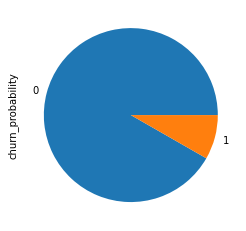

In [1125]:
#finding out churn / non-churn percentage
print((churn_filtered['churn_probability'].value_counts()/len(churn))*100)
((churn_filtered['churn_probability'].value_counts()/len(churn))*100).plot(kind='pie')
plt.show()

#### We can see that the 90% of the customers do not churn, hence there is a possibility of class imbalance

Therefore this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix_8) can be dropped from the dataset.

We can still clean the data by few possible columns relating to the good phase.

As we derived few columns in the good phase earlier, we can drop those related columns during creation.

In [1126]:
churn_filtered.drop(['av_rech_amt_data_6', 'total_rech_data_6', 'total_rech_amt_6', 
                     'av_rech_amt_data_7', 'total_rech_data_7', 'total_rech_amt_7'], axis = 1, inplace = True)

We can create new columns for defining the good phase variables and remove the separate 6th & 7th month variables.

Therefore before starting with further process check the remaining missing value handling, check for collinearity of the independent variables and try to understand their dependencies.

In [1127]:
#create a list of columns names for the each month
mon_6_cols = [col for col in churn_filtered.columns if '_6' in col]
mon_7_cols = [col for col in churn_filtered.columns if '_7' in col]
mon_8_cols = [col for col in churn_filtered.columns if '_8' in col]

In [1128]:
mon_7_cols

['arpu_7',
 'onnet_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'total_og_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_7',
 'std_ic_mou_7',
 'total_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7',
 'total_rech_num_7',
 'max_rech_amt_7',
 'last_day_rch_amt_7',
 'max_rech_data_7',
 'vol_2g_mb_7',
 'vol_3g_mb_7',
 'night_pck_user_7',
 'monthly_2g_7',
 'sachet_2g_7',
 'monthly_3g_7',
 'sachet_3g_7',
 'fb_user_7']

In [1129]:
#checking the correlation among the independent variables, dropping highly correlated ones
churn_corr = churn_filtered.corr()
churn_corr.loc[:,:] = np.tril(churn_corr, k = -1)
churn_corr = churn_corr.stack()
churn_corr
churn_corr[(churn_corr > 0.80) | (churn_corr < -0.80)].sort_values(ascending = False)

total_rech_amt_8    arpu_8               0.958953
fb_user_6           night_pck_user_6     0.957744
isd_og_mou_8        isd_og_mou_7         0.956635
fb_user_7           night_pck_user_7     0.955499
fb_user_8           night_pck_user_8     0.954382
isd_og_mou_7        isd_og_mou_6         0.936012
isd_og_mou_8        isd_og_mou_6         0.934200
total_ic_mou_6      loc_ic_mou_6         0.901348
total_ic_mou_8      loc_ic_mou_8         0.898511
sachet_2g_8         total_rech_data_8    0.897476
total_ic_mou_7      loc_ic_mou_7         0.883143
std_og_t2t_mou_7    onnet_mou_7          0.861786
std_og_t2t_mou_6    onnet_mou_6          0.860921
std_og_t2t_mou_8    onnet_mou_8          0.858635
std_og_t2m_mou_7    offnet_mou_7         0.857958
std_og_t2m_mou_8    offnet_mou_8         0.855066
total_og_mou_8      std_og_mou_8         0.850737
total_og_mou_7      std_og_mou_7         0.850341
loc_ic_mou_6        loc_ic_t2m_mou_6     0.846101
loc_og_mou_8        loc_og_mou_7         0.842607


In [1130]:
col_to_drop = ['fb_user_6','fb_user_7','total_ic_mou_6','total_ic_mou_7',
              'std_og_t2t_mou_7','std_og_t2t_mou_6', 'std_og_t2m_mou_7', 'std_ic_mou_7']

#these columns can be dropped as they are highly collinered with other predictor variables
#criteria set is for collinearity of 85%

#dropping these column
churn_filtered.drop(col_to_drop, axis = 1, inplace = True)

In [1131]:
#checking dimension of the dataframe after dropping highly correlated columns
churn_filtered.shape

(21013, 135)

### Step 4 : Data Preparation, EDA, Spliting Data and Performing Scaling

In [1132]:
# we have column called 'aon'
# thus we can derive new variable from this to explain the data with respect to churn
# creating a new variable 'tenure'

churn_filtered['tenure'] = (churn_filtered['aon']/30).round(0)

# as we are deriving a new column from 'aon', we can drop it
churn_filtered.drop('aon', axis = 1, inplace = True)

# checking shape
churn_filtered.shape

(21013, 135)

In [1133]:
churn_filtered.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,tenure
count,21013.0,21013.0,21013.0,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.0,21013.0,21013.0,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.0,21013.0,21013.0,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000
mean,0.0,0.0,0.0,558.458938,558.729577,506.861525,263.196803,268.555904,235.456107,378.131889,379.512377,338.603022,16.084861,12.821732,12.074758,27.284505,20.322529,19.277298,84.241662,85.420309,78.171154,163.486996,161.890721,151.609771,6.256449,6.341951,5.852662,1.593134,1.864696,1.685901,254.224799,253.879761,236

Observations -

- We can see that almost every columns has the some outliers, while most of them are becuase as there are 0.0, the service was not used some are actual outliers

- Since we don't have the actual bussines people to check the factfulness of the data, we will cap those features

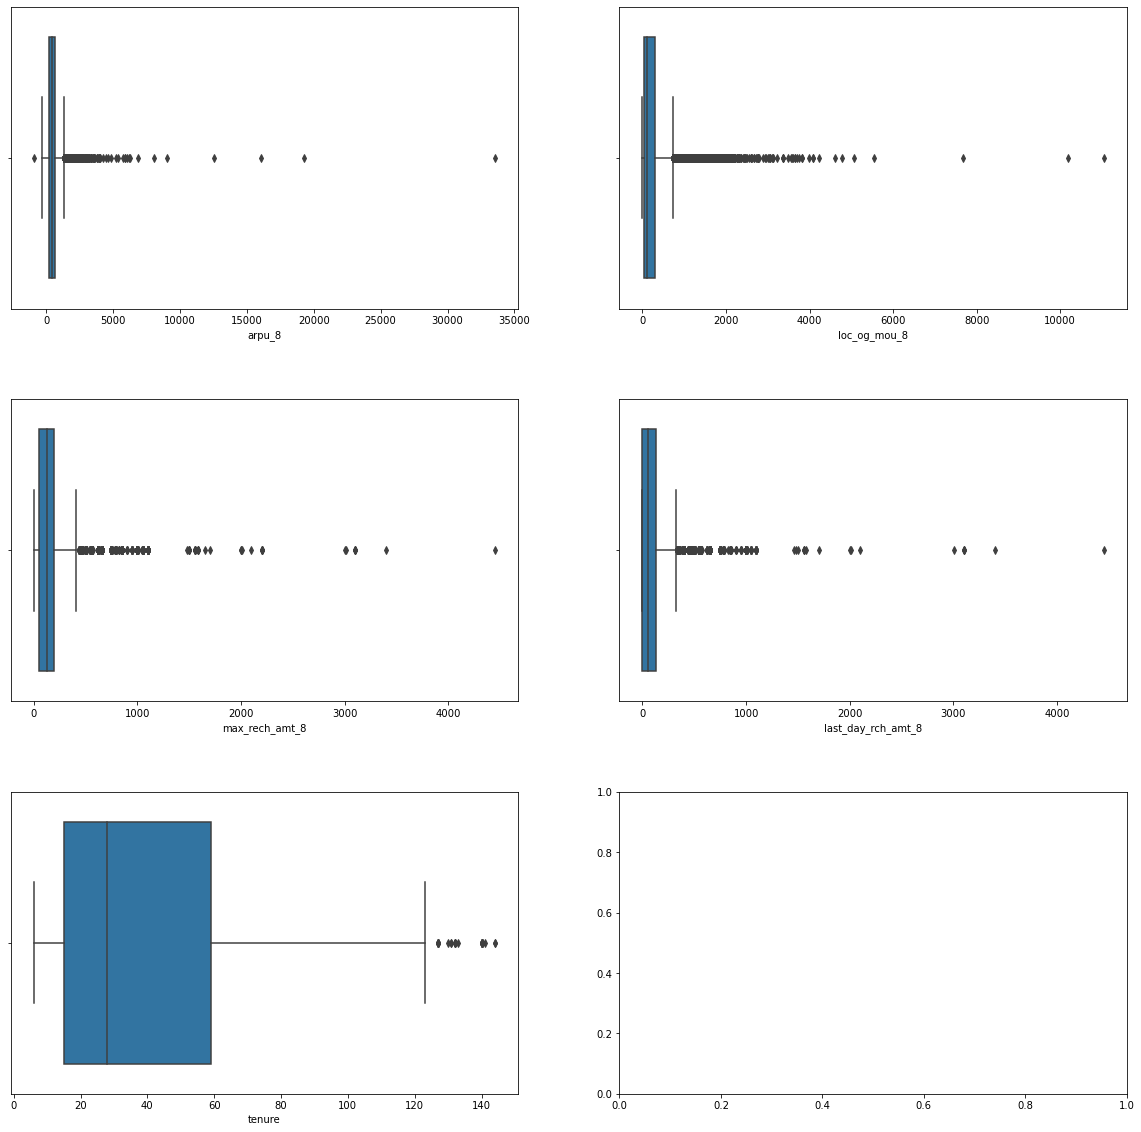

In [1134]:
# Going through the output of describe we can filter out the features that needs a second look

# List of features to be analyzed
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'tenure']

# Plot boxplots for each variable
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(churn_filtered[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

Observations -

- From the above plots we can see there are some upper limits to these suspected variables

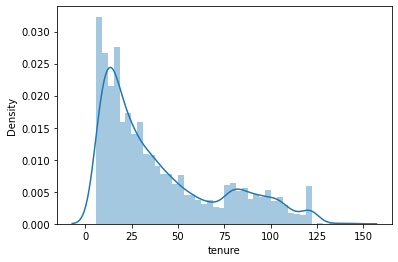

In [1135]:
# checking the distribution of the tenure variable

sns.distplot(churn_filtered['tenure'])
plt.show()

Observation -

- Though the varible is not skwed it is higly imbalanced, the number of non-churners in the dataset is around 90%

- We will handle this imbalance using SMOTE algorithm

In [1136]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = ['0-6 Months', '6-12 Months', '1-2 Years', '2-5 Years', '5 Years and above']
churn_filtered['tenure_range'] = pd.cut(churn_filtered['tenure'], tn_range, labels = tn_label)
churn_filtered['tenure_range'].head()

0    1-2 Years
1    1-2 Years
2    1-2 Years
3    2-5 Years
4    1-2 Years
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Years' < '2-5 Years' < '5 Years and above']

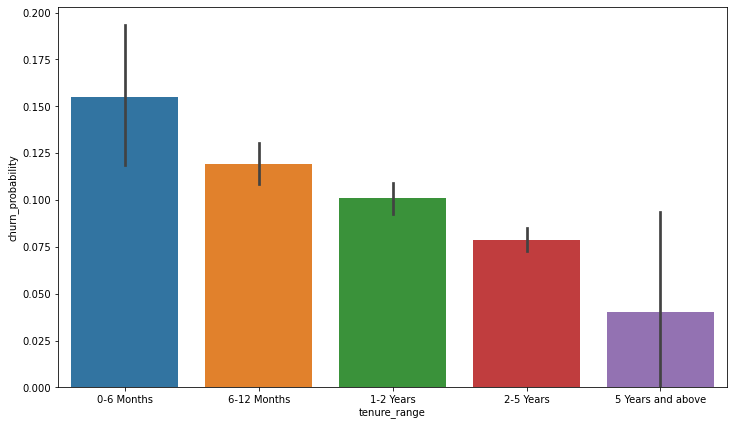

In [1137]:
# plotting a bar plot for tenure range
plt.figure(figsize = [12,7])
sns.barplot(x = 'tenure_range', y = 'churn_probability', data = churn_filtered)
plt.show()

It is clearly visible that the maximum churn rate happens within 0-6 months, but it gradually reduces, as the customer continues the same network.

Hence the average revenue per user is good phase of customer which is given by arpu_6 and arpu_7. Since we have two separate averages, lets take an average of these two and drop the other columns

In [1138]:
churn_filtered['avg_arpu_6_7'] = (churn_filtered['arpu_6'] + churn_filtered['arpu_7'])/2
churn_filtered['avg_arpu_6_7'].head()

0    184.4495 
1    478.9215 
2    1018.2270
3    362.0215 
4    370.7370 
Name: avg_arpu_6_7, dtype: float64

In [1139]:
# dropping the original column
churn_filtered.drop(['arpu_6','arpu_7'], axis = 1, inplace = True)

#checking the shape again
churn_filtered.shape

(21013, 135)

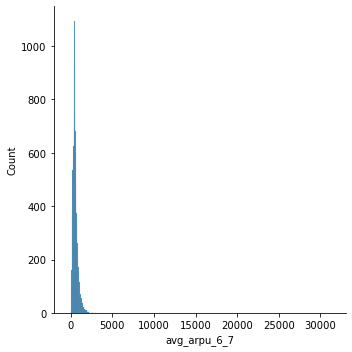

In [1140]:
# visualising newly created column
sns.displot(churn_filtered['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

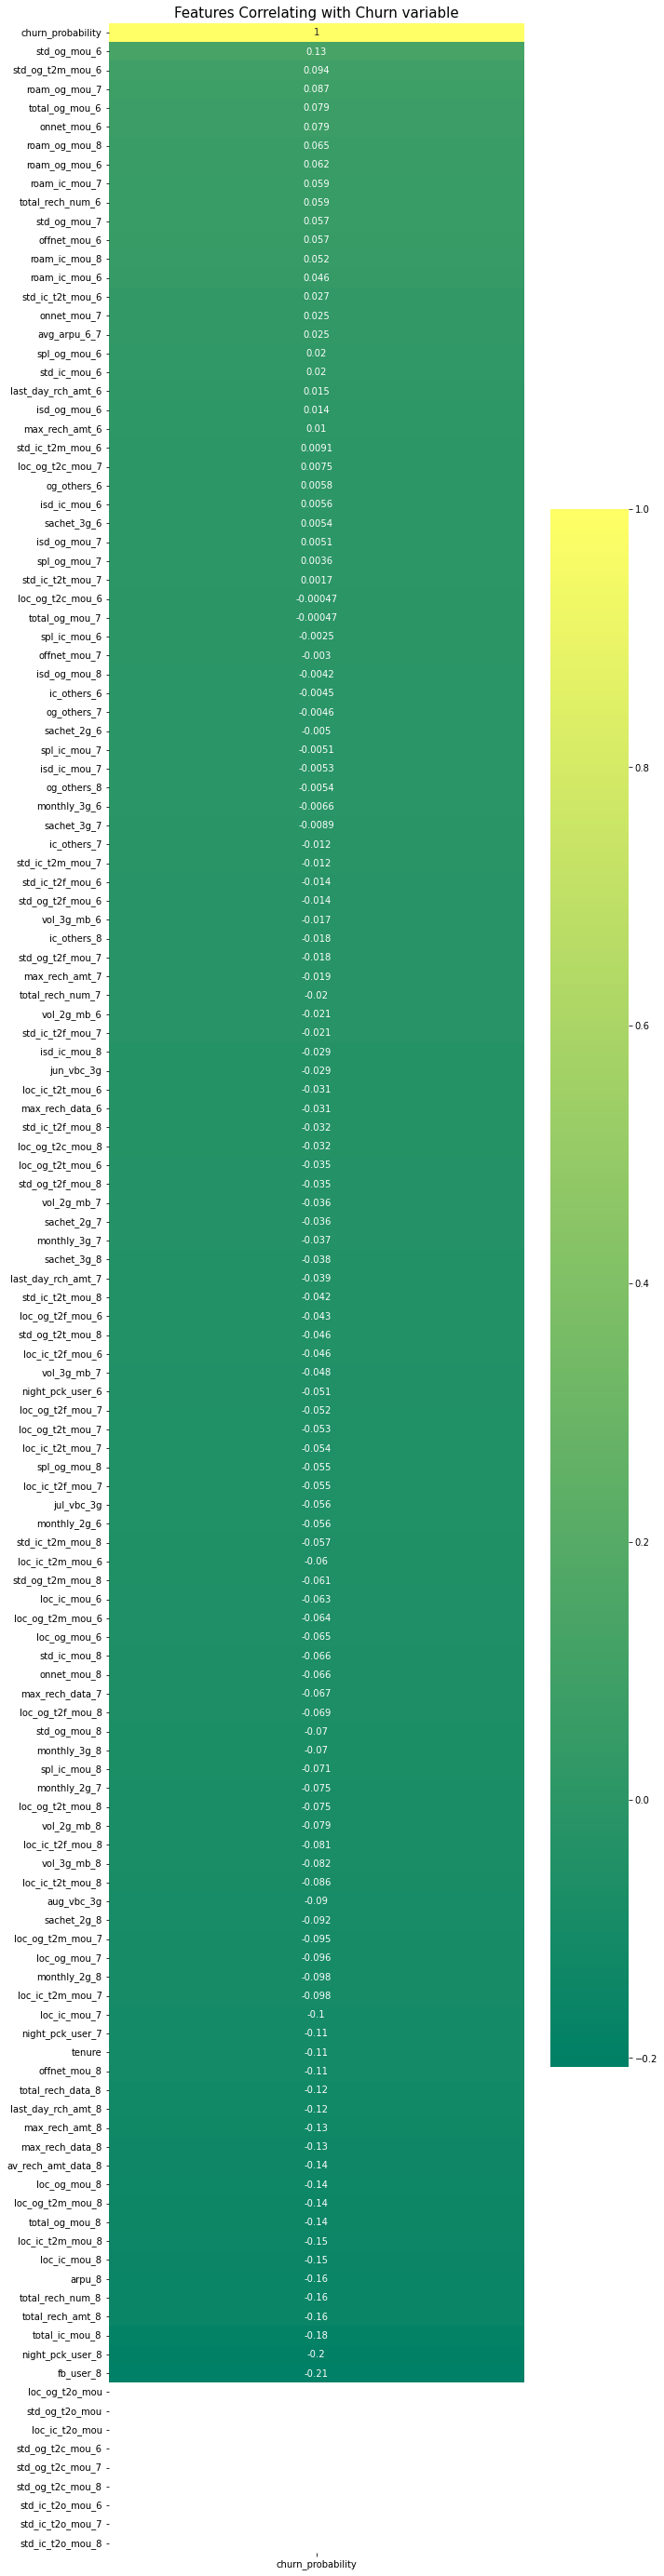

In [1141]:
#checking correlation between target variable with the other variable in the dataframe
plt.figure(figsize = (10,50))
heatmap_churn = sns.heatmap(churn_filtered.corr()[['churn_probability']].sort_values(ascending = False, by = 'churn_probability'), annot = True,
                           cmap = 'summer')
heatmap_churn.set_title('Features Correlating with Churn variable', fontsize = 15)

In [1142]:
churn_filtered.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_8', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'tenure', 'tenure_range',
       'avg_arpu_6_7'],
      dtype='object', length=135)

- Avg Outgoing calls & calls on roaming for 6th and 7th months are positively correlated with churn.

- Avg Revenue, No of Recharge for 8th Month has the negative correlation with churn.

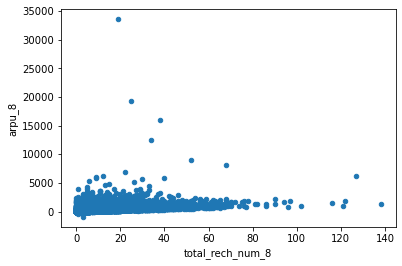

In [1143]:
#lets now draw a scatter plot between total recharge and average revenue for the 8th Month

churn_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y = 'arpu_8')
plt.show()

Observation - 

- We can clearly see that total_rech_num_8 have dropped significantly for the churners in the action pahse i.e 8th month, thus hitting the revenue generated from them


In [1144]:
#creating  categories for month 8 column total recharge and their count
churn_filtered['total_rech_data_group_8'] = pd.cut(churn_filtered['total_rech_data_8'], 
                                                   [-1, 0, 10, 25, 100], labels = ['No_Recharge', 
                                                                                   '<=10_Recharges',
                                                                                   '10-25_Recharges',
                                                                                   '>25_Recharges'])
churn_filtered['total_rech_num_group_8'] = pd.cut(churn_filtered['total_rech_num_8'], 
                                                   [-1, 0, 10, 25, 1000], labels = ['No_Recharge', 
                                                                                   '<=10_Recharges',
                                                                                   '10-25_Recharges',
                                                                                   '>25_Recharges'])

				Distribution of total_rech_data_8 variable 
 <=10_Recharges     10729
No_Recharge        9833 
10-25_Recharges    421  
>25_Recharges      30   
Name: total_rech_data_group_8, dtype: int64


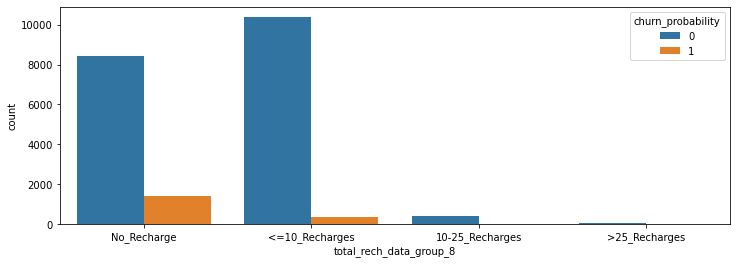

				Distribution of total_rech_num_group_8 variable
 <=10_Recharges     13533
10-25_Recharges    5829 
>25_Recharges      1255 
No_Recharge        396  
Name: total_rech_num_group_8, dtype: int64


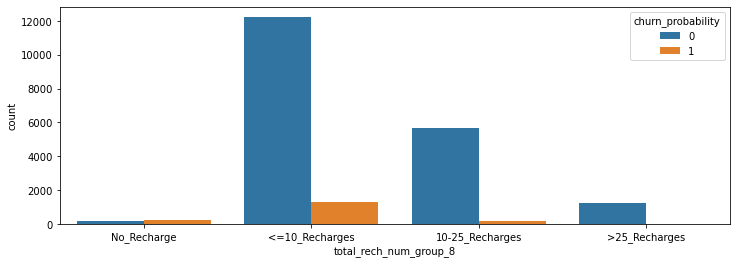

In [1145]:
#Plotting the results

plt.figure(figsize = [12, 4])
sns.countplot(data = churn_filtered, x = 'total_rech_data_group_8', hue = 'churn_probability')
print('\t\t\t\tDistribution of total_rech_data_8 variable \n', churn_filtered['total_rech_data_group_8'].value_counts())
plt.show()

plt.figure(figsize = [12,4])
sns.countplot(data = churn_filtered, x = 'total_rech_num_group_8', hue = 'churn_probability')
print('\t\t\t\tDistribution of total_rech_num_group_8 variable\n', churn_filtered['total_rech_num_group_8'].value_counts())
plt.show()

As the number of recharge rate increases, the churn rate decreases significantly.

In [1146]:
#dropping unnecessary columns
churn_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

In [1147]:
churn_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [1148]:
churn_filtered.shape

(21013, 56)

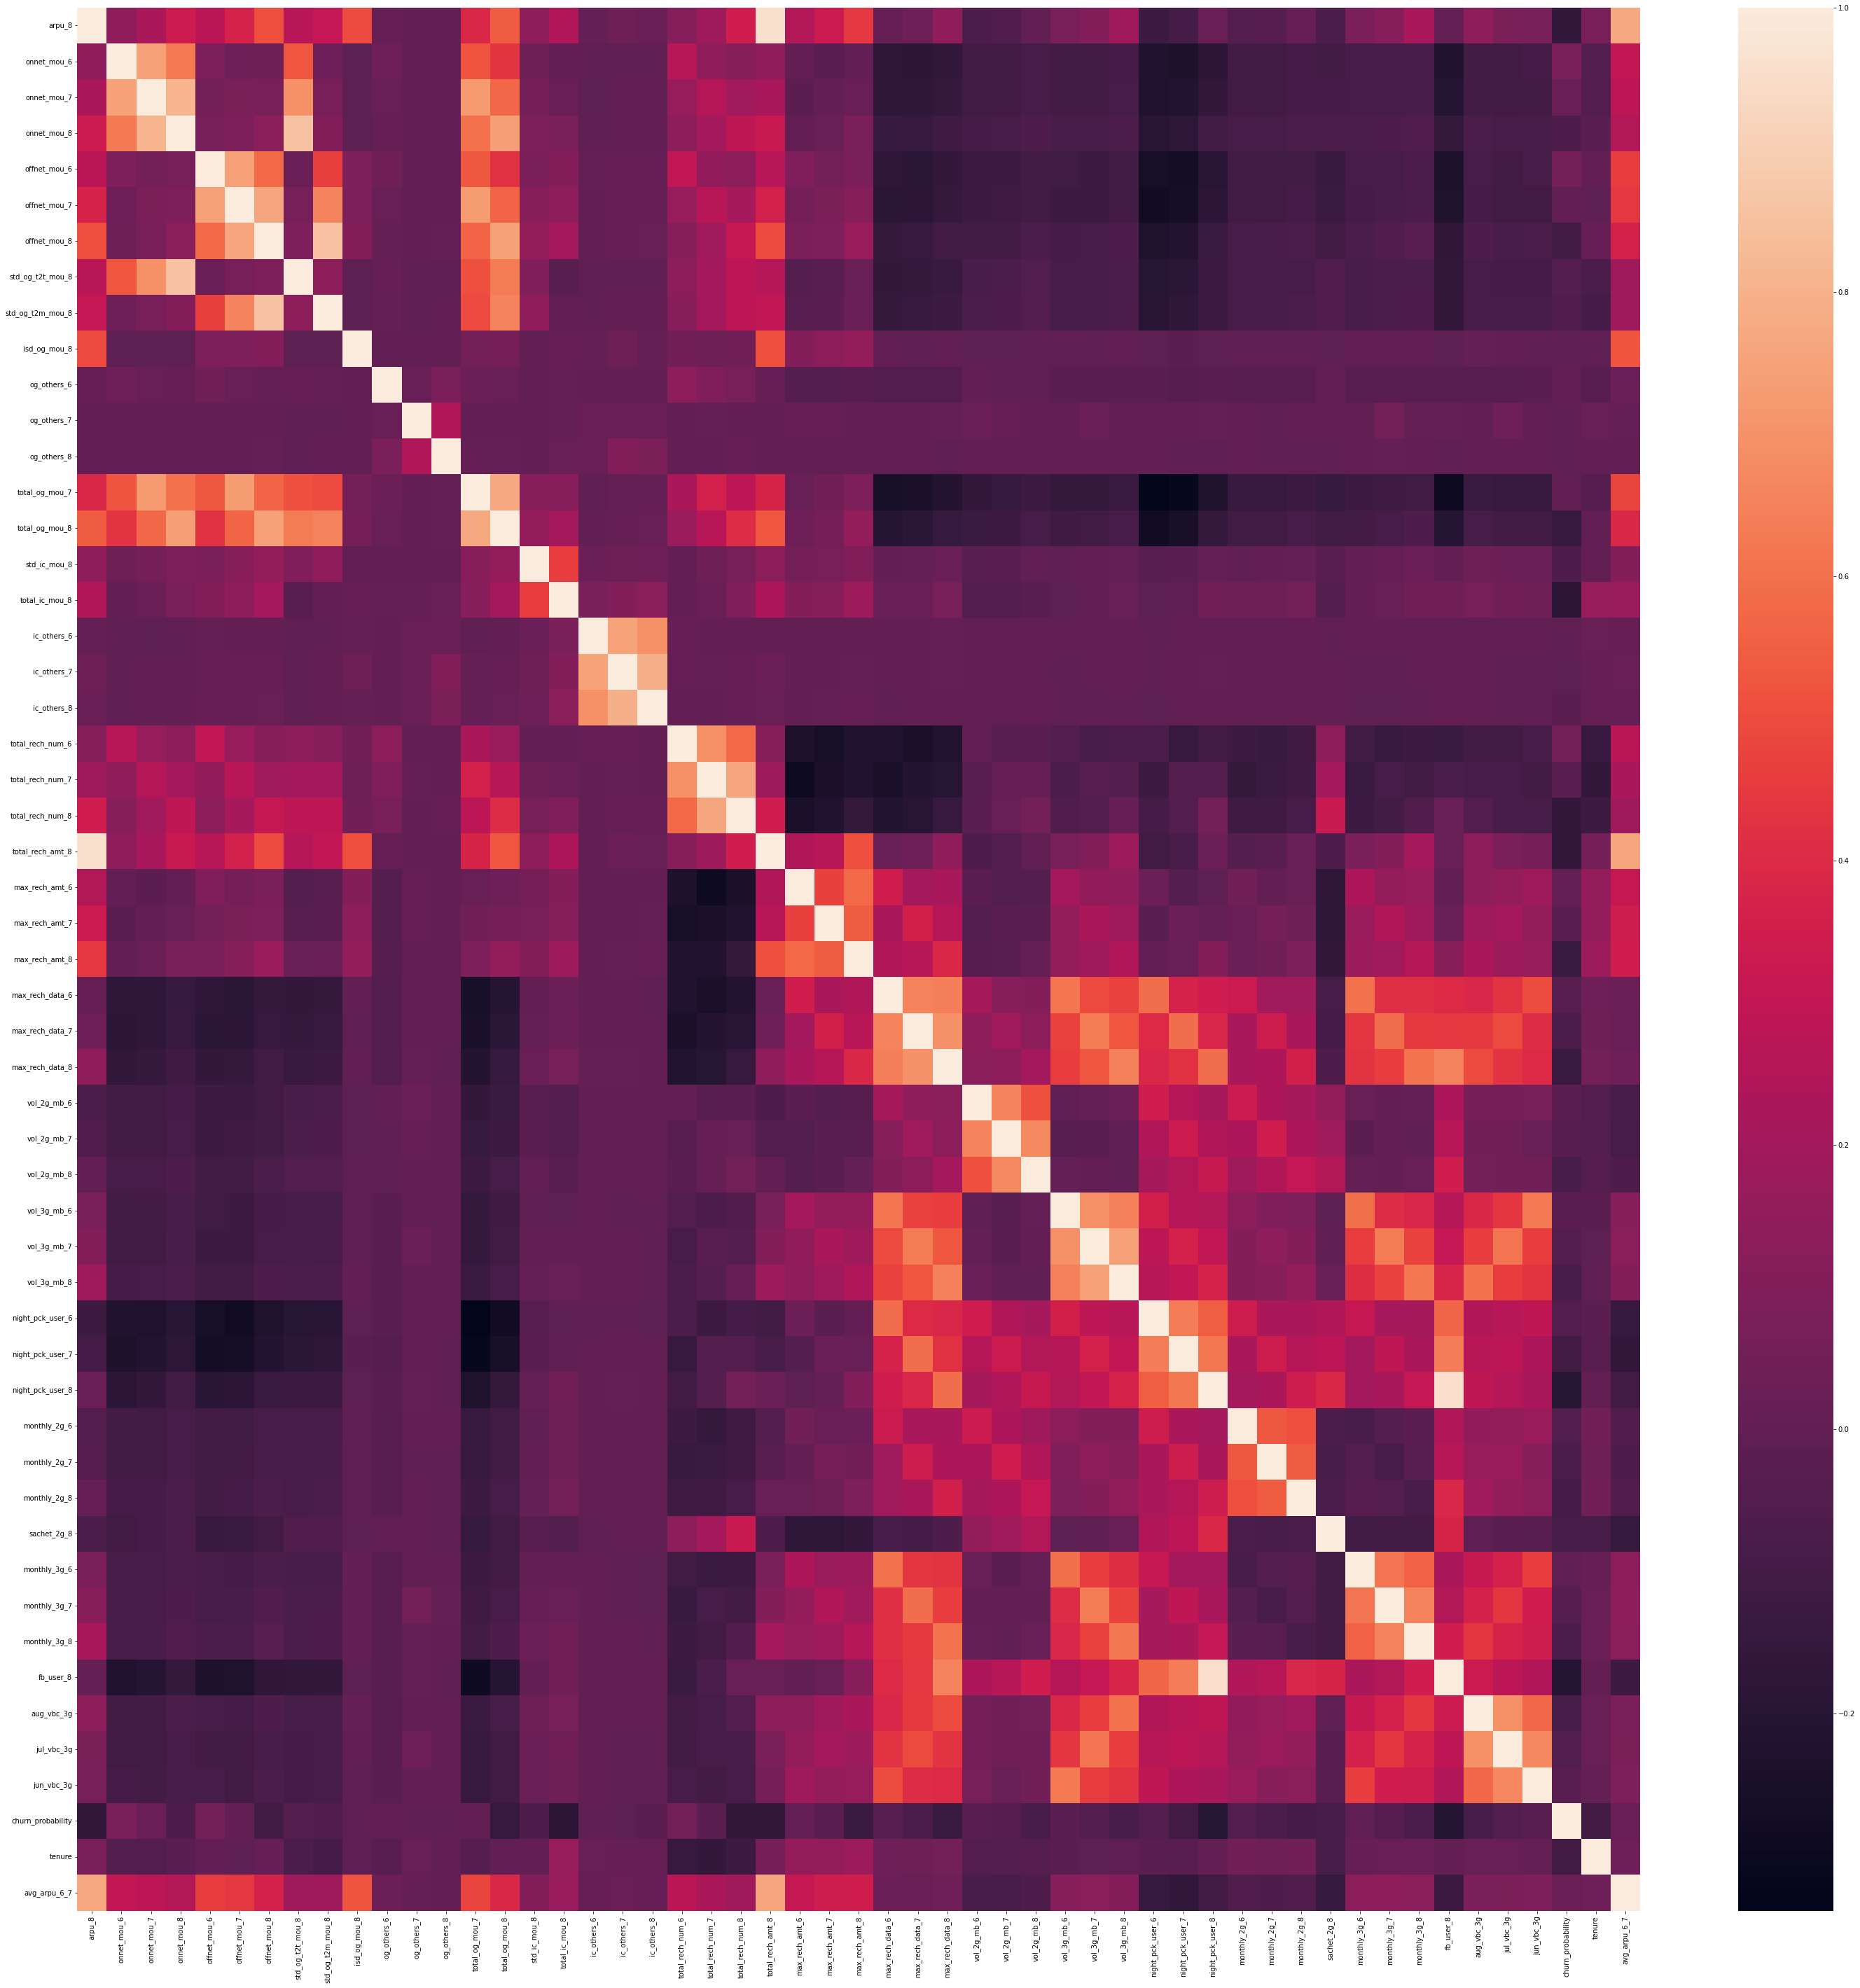

In [1149]:
plt.figure(figsize = (50,50))
sns.heatmap(churn_filtered.corr())
plt.show()

In [1150]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   arpu_8                   21013 non-null  float64 
 1   onnet_mou_6              21013 non-null  float64 
 2   onnet_mou_7              21013 non-null  float64 
 3   onnet_mou_8              21013 non-null  float64 
 4   offnet_mou_6             21013 non-null  float64 
 5   offnet_mou_7             21013 non-null  float64 
 6   offnet_mou_8             21013 non-null  float64 
 7   std_og_t2t_mou_8         21013 non-null  float64 
 8   std_og_t2m_mou_8         21013 non-null  float64 
 9   isd_og_mou_8             21013 non-null  float64 
 10  og_others_6              21013 non-null  float64 
 11  og_others_7              21013 non-null  float64 
 12  og_others_8              21013 non-null  float64 
 13  total_og_mou_7           21013 non-null  float64 
 14  total_

In [1151]:
churn_filtered.drop(['total_rech_data_group_8', 'total_rech_num_group_8',], axis = 1, inplace = True)

In [1152]:
churn_filtered.shape

(21013, 54)

In [1153]:
churn_filtered.drop(['tenure_range'], axis = 1, inplace = True)
churn_filtered.shape

(21013, 53)

In [1154]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arpu_8             21013 non-null  float64
 1   onnet_mou_6        21013 non-null  float64
 2   onnet_mou_7        21013 non-null  float64
 3   onnet_mou_8        21013 non-null  float64
 4   offnet_mou_6       21013 non-null  float64
 5   offnet_mou_7       21013 non-null  float64
 6   offnet_mou_8       21013 non-null  float64
 7   std_og_t2t_mou_8   21013 non-null  float64
 8   std_og_t2m_mou_8   21013 non-null  float64
 9   isd_og_mou_8       21013 non-null  float64
 10  og_others_6        21013 non-null  float64
 11  og_others_7        21013 non-null  float64
 12  og_others_8        21013 non-null  float64
 13  total_og_mou_7     21013 non-null  float64
 14  total_og_mou_8     21013 non-null  float64
 15  std_ic_mou_8       21013 non-null  float64
 16  total_ic_mou_8     210

In [1155]:
churn_rate = (sum(churn_filtered['churn_probability']) / len(churn_filtered['churn_probability'].index)) * 100
churn_rate

8.275829248560415

##### Splitting Data Into Train & Test DataSet

In [1156]:
churn_filtered.shape

(21013, 53)

In [1157]:
#dividing data into train and test sets

X = churn_filtered.drop('churn_probability', axis = 1)
y = churn_filtered.churn_probability

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [1158]:
X_train.shape

(15759, 52)

In [1159]:
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15759,)
(5254, 52)
(5254,)


##### Perform Scaling

In [1160]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
13528,553.107,597.83,448.53,594.29,149.26,175.73,299.99,569.78,194.28,0.00,2.31,0.0,0.0,567.31,811.06,20.54,74.66,0.00,0.00,0.00,10,10,9,677,128,110,150,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,99.0,533.9885
7183,199.111,364.79,617.33,51.71,124.69,258.86,40.08,0.00,0.00,0.00,0.00,0.0,0.0,843.16,0.00,0.00,0.00,0.00,0.00,0.00,19,27,5,180,36,50,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,37.0,520.9410
14666,267.706,84.68,117.61,87.43,552.86,510.43,383.46,3.40,30.44,1.55,0.00,0.0,0.0,628.04,470.89,77.16,679.71,3.83,5.28,13.16,2,6,2,200,150,215,200,152.0,152.0,152.0,17.59,25.76,42.74,495.46,397.32,289.58,0.0,0.0,0.0,0,0,0,1,0,0,0,1.0,197.37,288.6,185.75,93.0,397.1430
17922,409.262,636.51,728.43,700.23,177.04,137.53,162.48,694.38,135.54,0.00,0.00,0.0,0.0,865.96,862.88,18.84,25.21,0.00,0.00,0.00,11,10,11,596,110,110,130,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,12.0,444.9220
5165,293.627,739.41,185.51,66.08,481.24,673.68,534.98,53.94,488.14,0.00,0.00,0.0,0.0,861.13,547.49,10.98,24.11,0.00,0.00,0.00,12,13,6,360,110,110,130,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,32.0,470.9800


In [1161]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15759 entries, 13528 to 20561
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arpu_8            15759 non-null  float64
 1   onnet_mou_6       15759 non-null  float64
 2   onnet_mou_7       15759 non-null  float64
 3   onnet_mou_8       15759 non-null  float64
 4   offnet_mou_6      15759 non-null  float64
 5   offnet_mou_7      15759 non-null  float64
 6   offnet_mou_8      15759 non-null  float64
 7   std_og_t2t_mou_8  15759 non-null  float64
 8   std_og_t2m_mou_8  15759 non-null  float64
 9   isd_og_mou_8      15759 non-null  float64
 10  og_others_6       15759 non-null  float64
 11  og_others_7       15759 non-null  float64
 12  og_others_8       15759 non-null  float64
 13  total_og_mou_7    15759 non-null  float64
 14  total_og_mou_8    15759 non-null  float64
 15  std_ic_mou_8      15759 non-null  float64
 16  total_ic_mou_8    15759 non-null  fl

In [1162]:
num_col = X_train.select_dtypes(include = ['int64', 'float64']).columns.tolist()

In [1163]:
num_col

['arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'isd_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_7',
 'total_og_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'fb_user_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'tenure',
 'avg_arpu_6_7']

In [1164]:
# applying scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [1165]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
13528,0.043460,0.081043,0.054982,0.059564,0.017849,0.029850,0.021417,0.071094,0.013927,0.000000,0.003788,0.0,0.0,0.068469,0.057755,0.005437,0.015553,0.000000,0.00000,0.000000,0.058824,0.072464,0.065217,0.014938,0.031920,0.033343,0.033715,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.673913,0.030909
7183,0.033196,0.049452,0.075674,0.005183,0.014911,0.043970,0.002861,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.101762,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.111765,0.195652,0.036232,0.003972,0.008978,0.015156,0.011238,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.224638,0.030500
14666,0.035185,0.011479,0.014417,0.008763,0.066113,0.086703,0.027376,0.000424,0.002182,0.000427,0.000000,0.0,0.0,0.075799,0.033532,0.020424,0.141594,0.002849,0.00353,0.010877,0.011765,0.043478,0.014493,0.004413,0.037406,0.065171,0.044954,0.097749,0.097749,0.097749,0.00171,0.003272,0.003844,0.010833,0.014117,0.009641,0.5,0.5,0.5,0.0,0.0,0.0,0.022727,0.0,0.0,0.0,1.0,0.015281,0.031487,0.016635,0.630435,0.026618
17922,0.039289,0.086286,0.089293,0.070182,0.021171,0.023361,0.011600,0.086641,0.009716,0.000000,0.000000,0.0,0.0,0.104513,0.061445,0.004987,0.005252,0.000000,0.00000,0.000000,0.064706,0.072464,0.079710,0.013151,0.027431,0.033343,0.029220,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.043478,0.028116
5165,0.035937,0.100236,0.022740,0.006623,0.057548,0.114432,0.038193,0.006730,0.034992,0.000000,0.000000,0.0,0.0,0.103930,0.038987,0.002906,0.005022,0.000000,0.00000,0.000000,0.070588,0.094203,0.043478,0.007944,0.027431,0.033343,0.029220,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.188406,0.028933


As there are many variables we will start the process of dropping variables after doing the RFE

### Step 5 : Preparing Model for Predictor variables selection and Model Evaluation

##### Data Modeling, Model Evaluation and Prepare Model for Predictor Variables Selection 


##### Data Imbalance Handling

Using SMOTE method, we can balance the data with respect to churn variable and proceed further

In [1166]:
smote = SMOTE(random_state = 42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

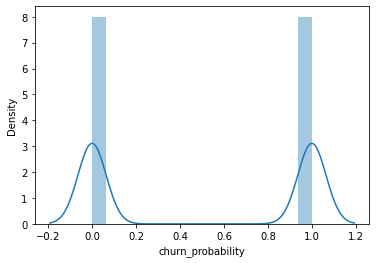

In [1167]:
sns.distplot(y_train_sm)
plt.show()

Now the class is balanced and the target variable is not skwed

In [1168]:
print('Dimension of X_train_sm Shape', X_train_sm.shape)
print('Dimension of y_train_sm Shape', y_train_sm.shape)

Dimension of X_train_sm Shape (28910, 52)
Dimension of y_train_sm Shape (28910,)


### Logistic Regression

In [1169]:
#building logistic regression model
logm1 = sm.GLM(y_train_sm, (sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                28910
Model:                            GLM   Df Residuals:                    28857
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 14 Dec 2022   Deviance:                       22394.
Time:                        03:17:29   Pearson chi2:                 1.80e+07
No. Iterations:                    39   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2170      0.197      1.104      0.270      -0.168       0.602
arpu_8              -5.5828      6.773     -0.824      0.410     -18.858       7.692
onnet_mou_6         -0.7263      0.484     -1.500      0.134      -1.675       0.223
onnet_mou_7         -7.1595      2.151     -3.328      0.001     -11.375      -2.944
onnet_mou_8         75.8806      3.628     20.917      0.000      68.770      82.991
offnet_mou_6        -0.3989      0.567     -0.703      0.482      -1.511       0.713
offnet_mou_7        -5.2920      1.536     -3.445      0.001      -8.303      -2.281
offnet_mou_8        96.9212      4.667     20.769      0.000      87.775     106.068
std_og_t2t_mou_8     7.7649      1.622      4.788      0.000       4.586      10.944
std_og_t2m_mou_8    19.7109      2.965      6.648      0.000      13.900      25.522
isd_og_mou_8        36.3631      4.428      8.212      0.000      27.684      45.042
og_others_6        -14.6087      6.447     -2.266      0.023     -27.244      -1.973
og_others_7         -3.5242      9.742     -0.362      0.718     -22.619      15.570
og_others_8      -5.213e+05    5.8e+07     -0.009      0.993   -1.14e+08    1.13e+08
total_og_mou_7       8.6655      2.010      4.310      0.000       4.725      12.606
total_og_mou_8    -120.3230      4.488    -26.812      0.000    -129.119    -111.527
std_ic_mou_8         9.4941      1.393      6.816      0.000       6.764      12.224
total_ic_mou_8     -21.3638      0.977    -21.869      0.000     -23.278     -19.449
ic_others_6        -11.8896      5.113     -2.325      0.020     -21.911      -1.868
ic_others_7          8.8567      4.551      1.946      0.052      -0.064      17.777
ic_others_8         -1.1223      5.517     -0.203      0.839     -11.935       9.690
total_rech_num_6     1.4315      0.574      2.496      0.013       0.307       2.556
total_rech_num_7     4.6727      0.579      8.068      0.000       3.538       5.808
total_rech_num_8   -10.9223      0.756    -14.452      0.000     -12.404      -9.441
total_rech_amt_8   -87.6504      8.950     -9.793      0.000    -105.193     -70.108
max_rech_amt_6      -1.3481      0.595     -2.267      0.023      -2.514      -0.183
max_rech_amt_7      -0.4347      0.495     -0.878      0.380      -1.404       0.535
max_rech_amt_8       2.8383      1.059      2.681      0.007       0.764       4.913
max_rech_data_6      0.2782      0.543      0.512      0.609      -0.787       1.343
max_rech_data_7      2.7959      0.584      4.786      0.000       1.651       3.941
max_rech_data_8     -1.0049      0.718     -1.400      0.162      -2.412       0.402
vol_2g_mb_6         -0.6271      0.855     -0.734      0.463      -2.303       1.048
vol_2g_mb_7          3.3258      0.734      4.529      0.000       1.886       4.765
vol_2g_mb_8         -4.

#### Logistic Regression Using Feature Selection (RFE Method)

In [1170]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

#running RFE for 20 variable as output
rfe = RFE(logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train_sm, y_train_sm)

In [1171]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
        True, False,  True, False, False, False,  True])

In [1172]:
rfe_columns = X_train_sm.columns[rfe.support_]
print('The selected columns by RFE for modeling are: \n\n', rfe_columns)

The selected columns by RFE for modeling are: 

 Index(['arpu_8', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'total_og_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g',
       'avg_arpu_6_7'],
      dtype='object')


In [1173]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 3),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 27),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 7),
 ('std_og_t2t_mou_8', False, 14),
 ('std_og_t2m_mou_8', False, 26),
 ('isd_og_mou_8', False, 8),
 ('og_others_6', False, 15),
 ('og_others_7', False, 21),
 ('og_others_8', False, 29),
 ('total_og_mou_7', False, 4),
 ('total_og_mou_8', True, 1),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_8', True, 1),
 ('ic_others_6', False, 31),
 ('ic_others_7', False, 28),
 ('ic_others_8', False, 20),
 ('total_rech_num_6', True, 1),
 ('total_rech_num_7', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_6', True, 1),
 ('max_rech_amt_7', False, 12),
 ('max_rech_amt_8', True, 1),
 ('max_rech_data_6', False, 30),
 ('max_rech_data_7', False, 9),
 ('max_rech_data_8', False, 23),
 ('vol_2g_mb_6', False, 33),
 ('vol_2g_mb_7', False, 5),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_6', 

#### Assessing the model with StatsModels

In [1174]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm, X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                28910
Model:                            GLM   Df Residuals:                    28889
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11906.
Date:                Wed, 14 Dec 2022   Deviance:                       23811.
Time:                        03:19:15   Pearson chi2:                 2.07e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4303
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1961      0.165      1.186      0.236      -0.128       0.520
arpu_8               7.2868      5.629      1.295      0.195      -3.746      18.319
onnet_mou_7          5.4064      0.491     11.007      0.000       4.444       6.369
offnet_mou_6         0.5460      0.535      1.020      0.308      -0.503       1.595
offnet_mou_7         2.6138      0.427      6.118      0.000       1.776       3.451
total_og_mou_8     -15.6507      0.975    -16.045      0.000     -17.563     -13.739
std_ic_mou_8        21.0384      1.257     16.735      0.000      18.574      23.502
total_ic_mou_8     -34.9448      0.843    -41.434      0.000     -36.598     -33.292
total_rech_num_6     2.6801      0.491      5.458      0.000       1.718       3.643
total_rech_num_7     3.3810      0.519      6.508      0.000       2.363       4.399
total_rech_num_8   -11.7347      0.683    -17.179      0.000     -13.073     -10.396
total_rech_amt_8   -38.0185      6.570     -5.787      0.000     -50.895     -25.142
max_rech_amt_6       0.4507      0.529      0.852      0.394      -0.586       1.487
max_rech_amt_8      -1.7750      0.754     -2.355      0.019      -3.252      -0.298
vol_2g_mb_8         -5.1617      1.106     -4.665      0.000      -7.330      -2.993
vol_3g_mb_8         -5.0002      1.297     -3.854      0.000      -7.543      -2.458
monthly_2g_8        -7.4544      0.438    -17.035      0.000      -8.312      -6.597
sachet_2g_8         -5.8319      0.511    -11.416      0.000      -6.833      -4.831
monthly_3g_8        -5.5034      0.894     -6.157      0.000      -7.255      -3.752
aug_vbc_3g          -9.6254      1.116     -8.626      0.000     -11.812      -7.438
avg_arpu_6_7        40.7496      3.383     12.045      0.000      34.119      47.381
====================================================================================
"""

In [1175]:
# getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.46213275, 0.92969285, 0.02331119, 0.52167338, 0.73533445,
       0.64270193, 0.13105183, 0.08483161, 0.1320682 , 0.9422494 ])

In [1176]:
#creating a dataframe with the actual churn flag and the predicted probabilites
y_train_sm_pred_final = pd.DataFrame({'Converted': y_train_sm.values, 'Converted_Prob': y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_Prob
0,0,0.462133
1,1,0.929693
2,0,0.023311
3,0,0.521673
4,0,0.735334


#### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [1177]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

#viewing the predictions results
y_train_sm_pred_final.head()

,Converted,Converted_Prob,churn_pred
0,0,0.462133,0
1,1,0.929693,1
2,0,0.023311,0
3,0,0.521673,1
4,0,0.735334,1


In [1178]:
#Confusion Matrix
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred)
print(confusion)

[[11630  2825]
 [ 2238 12217]]


#### Confusion Matrix

#### Predicted not_churn churn

#### Actual

#### not_churn 11630 2825

#### churn 2238 12217

In [1179]:
#checking the overall accuracy 
print('The overall accuracy of the model is: ', metrics.accuracy_score(y_train_sm_pred_final.Converted,
                                                                      y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is:  0.82487028709789


#### Checking for VIF values of the feature variables

In [1180]:
# create a dataframe that will contain the names of all the features variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
19,avg_arpu_6_7,26.75
0,arpu_8,24.73
8,total_rech_num_7,8.53
9,total_rech_num_8,6.71
7,total_rech_num_6,5.97
10,total_rech_amt_8,5.66
3,offnet_mou_7,5.29
4,total_og_mou_8,5.10
2,offnet_mou_6,4.70
12,max_rech_amt_8,3.46


#### Metrics beyond simply accuracy

In [1181]:
TP = confusion[1, 1]     #true positive
TN = confusion[0, 0]     #true negative
FP = confusion[0, 1]     #false positive
FN = confusion[1, 0]     #false negative

In [1182]:
#Let's check the Accuracy of our Logistic Regression Model
print("Accuracy : ", (TP+TN) / float(TP + TN + FN + FP))

#Let's check the Sensitivity of our Logistic Regression Model
print("Sensitivity : ", TP / float(TP + FN))

#Let's check the Specificity of our Logistic Regression Model
print("Specificity : ", TN / float(TN + FP))

#Let's check the False Positive Rate - Predicting churn when customer does not have churned
print("False Positive Rate : ", FP / float(TN + FP))

#Let's check the Positive Predictive Value
print("Precision : ", TP / float(TP + FP))


#Let's check the Negative Predictive Value
print("True Negative Predictive Rate : ", TN / float(TN + FN))


Accuracy :  0.82487028709789
Sensitivity :  0.8451746800415081
Specificity :  0.8045658941542719
False Positive Rate :  0.19543410584572812
Precision :  0.8121925275894163
True Negative Predictive Rate :  0.8386212864147679


In [1183]:
#plotting the ROC Curve

#Defining a function to plot the ROC Curve

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristics example')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return None

In [1184]:
#defining a variable to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_Prob, drop_intermediate = False)

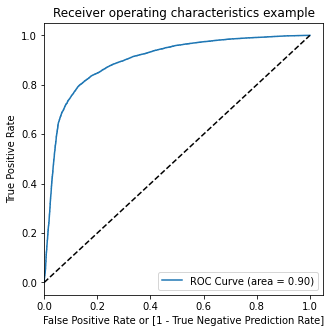

In [1185]:
#Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_Prob)

#### Finding optimal cutoff point

In [1186]:
#creating columns with different probability cutoff
numbers = [float(x) / 10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i] = y_train_sm_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_Prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0


In [1187]:
#calculating accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['probability', 'accuracy', 'sensitivity', 'specificity'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1, 1]     #true positive
# TN = confusion[0, 0]     #true negative
# FP = confusion[0, 1]     #false positive
# FN = confusion[1, 0]     #false negative

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    
    specificity = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensitivity = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
    
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.683293  0.974957     0.391629   
0.2  0.2          0.743065  0.951228     0.534901   
0.3  0.3          0.782255  0.919958     0.644552   
0.4  0.4          0.810377  0.885368     0.735386   
0.5  0.5          0.824870  0.845175     0.804566   
0.6  0.6          0.832722  0.796749     0.868696   
0.7  0.7          0.819613  0.722103     0.917122   
0.8  0.8          0.766482  0.577793     0.955171   
0.9  0.9          0.608717  0.234521     0.982912   


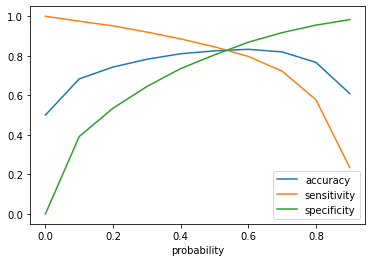

In [1188]:
#plotting accuracy sensitivity and specificity for various probabilities calculated above
cutoff_df.plot.line(x = 'probability', y = ['accuracy', 'sensitivity', 'specificity'])
plt.show()

Observation - 

- Initially we selected the optimum point of classification as 0.5

- From the above graph, we can see the optimum cutoff is little higher than 0.5 but lies lower than 0.6 So lets tweek more within the range

In [1189]:
#creating columns with refined probability cutoffs
numbers = [0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61]

for i in numbers:
    y_train_sm_pred_final[i] = y_train_sm_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)

y_train_sm_pred_final.head()

,Converted,Converted_Prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.61
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1


In [1190]:
#calculating accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['probability', 'accuracy', 'sensitivity', 'specificity'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1, 1]     #true positive
# TN = confusion[0, 0]     #true negative
# FP = confusion[0, 1]     #false positive
# FN = confusion[1, 0]     #false negative

num = [0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    
    specificity = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensitivity = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
    
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50  0.50         0.824870  0.845175     0.804566   
0.51  0.51         0.826773  0.842062     0.811484   
0.52  0.52         0.828571  0.838395     0.818748   
0.53  0.53         0.829298  0.833068     0.825527   
0.54  0.54         0.829505  0.827534     0.831477   
0.55  0.55         0.830439  0.822899     0.837980   
0.56  0.56         0.831235  0.818402     0.844068   
0.57  0.57         0.831581  0.813767     0.849395   
0.58  0.58         0.831615  0.807887     0.855344   
0.59  0.59         0.832065  0.802629     0.861501   
0.60  0.60         0.832722  0.796749     0.868696   
0.61  0.61         0.831996  0.790176     0.873815   


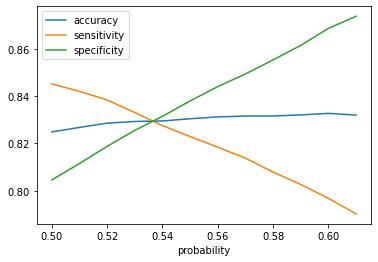

In [1191]:
#plotting accuracy sensitivity and specificity for various probabilities calculated above
cutoff_df.plot.line(x = 'probability', y = ['accuracy', 'sensitivity', 'specificity'])
plt.show()

Observation - 

- 0.54 can be considered as the optimal cutoff point in the probability to define the predicted churn variable meets

In [1192]:
#using above curve, we are taking 0.54 as the optimal point to take it as a cutoff probability

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_Prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.61,final_churn_pred
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1


In [1193]:
#calculating the overall accuracy again
print('The overall accuracy of the model :', metrics.accuracy_score(y_train_sm_pred_final.Converted,
                                                                   y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model : 0.8292978208232445


In [1194]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred)
print(confusion2)

[[11933  2522]
 [ 2413 12042]]


In [1195]:
TP2 = confusion2[1, 1]     #true positive
TN2 = confusion2[0, 0]     #true negative
FP2 = confusion2[0, 1]     #false positive
FN2 = confusion2[1, 0]     #false negative

#Let's check the Accuracy of our Logistic Regression Model
print("Accuracy : ", ((TP2 + TN2)/(TP2 + TN2 + FP2 + FN2)))

#Let's check the Sensitivity of our Logistic Regression Model
print("Sensitivity : ", TP2 / float(TP2 + FN2))

#Let's check the Specificity of our Logistic Regression Model
print("Specificity : ", TN2 / float(TN2 + FP2))

#Let's check the False Positive Rate - Predicting churn when customer does not have churned
print("False Positive Rate : ", FP2 / float(TN2 + FP2))

#Let's check the Positive Predictive Value
print("Precision : ", TP2 / float(TP2 + FP2))


#Let's check the Negative Predictive Value
print("True Negative Predictive Rate : ", TN2 / float(TN2 + FN2))


Accuracy :  0.8292978208232445
Sensitivity :  0.8330681425112418
Specificity :  0.8255274991352474
False Positive Rate :  0.1744725008647527
Precision :  0.826833287558363
True Negative Predictive Rate :  0.8317998048236442


#### Precision & Recall Tradeoff

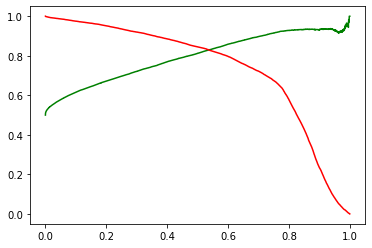

In [1196]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_Prob)

#plotting the curve
plt.plot(thresholds, p[:-1], 'g-')
plt.plot(thresholds, r[:-1], 'r-')
plt.show()

#### Making Predictions on the test set

##### Transforming and feature selection for the test data

In [1197]:
#Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
15213,0.027423,0.010572,0.001738,0.000000,0.230827,0.038560,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.026877,0.00000,0.000000,0.000000,0.000357,0.000000,0.000000,0.141176,0.036232,0.021739,0.000000,0.027431,0.033343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.072464,0.031985
4229,0.034596,0.044357,0.003550,0.005270,0.013873,0.019583,0.004036,0.000000,0.000002,0.0,0.000000,0.0,0.0,0.017722,0.00661,0.000731,0.023340,0.000342,0.000455,0.001372,0.052941,0.043478,0.021739,0.004303,0.029925,0.046681,0.039335,0.099035,0.099035,0.112540,0.000261,0.000070,0.002909,0.021951,0.027973,0.016452,0.5,0.5,0.5,0.25,0.2,0.4,0.000000,0.0,0.0,0.0,1.0,0.007328,0.020946,0.016365,0.014493,0.025160
12573,0.029726,0.029326,0.009352,0.000068,0.136577,0.213513,0.009037,0.000085,0.009004,0.0,0.005707,0.0,0.0,0.161518,0.00920,0.000365,0.000585,0.000000,0.000000,0.000000,0.052941,0.079710,0.021739,0.000662,0.027431,0.033343,0.006743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.033341
19178,0.052097,0.078142,0.049328,0.041272,0.059096,0.048713,0.061279,0.049712,0.040981,0.0,0.000000,0.0,0.0,0.083179,0.09174,0.000524,0.036805,0.000342,0.000000,0.000000,0.182353,0.289855,0.239130,0.021536,0.022444,0.009094,0.022477,0.000000,0.016077,0.010932,0.000000,0.051287,0.008589,0.000000,0.000000,0.000000,0.0,0.5,0.5,0.00,0.0,0.0,0.045455,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.007246,0.036936
15524,0.027423,0.107705,0.037836,0.000000,0.098439,0.067828,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.080973,0.00000,0.000000,0.000000,0.005476,0.000000,0.000000,0.111765,0.079710,0.043478,0.000000,0.027431,0.033343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.072464,0.032732


In [1198]:
#feature selection
X_test_rfe = X_test[rfe_columns]
X_test_rfe.head()

,arpu_8,onnet_mou_7,offnet_mou_6,offnet_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aug_vbc_3g,avg_arpu_6_7
15213,0.027423,0.001738,0.230827,0.038560,0.00000,0.000000,0.000000,0.141176,0.036232,0.021739,0.000000,0.027431,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.031985
4229,0.034596,0.003550,0.013873,0.019583,0.00661,0.000731,0.023340,0.052941,0.043478,0.021739,0.004303,0.029925,0.039335,0.002909,0.016452,0.4,0.000000,0.0,0.007328,0.025160
12573,0.029726,0.009352,0.136577,0.213513,0.00920,0.000365,0.000585,0.052941,0.079710,0.021739,0.000662,0.027431,0.006743,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.033341
19178,0.052097,0.049328,0.059096,0.048713,0.09174,0.000524,0.036805,0.182353,0.289855,0.239130,0.021536,0.022444,0.022477,0.008589,0.000000,0.0,0.045455,0.0,0.000000,0.036936
15524,0.027423,0.037836,0.098439,0.067828,0.00000,0.000000,0.000000,0.111765,0.079710,0.043478,0.000000,0.027431,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.032732


In [1199]:
#adding constant to the test model
X_test_SM = sm.add_constant(X_test_rfe)

In [1200]:
# Predicting the target variables
y_test_pred = res.predict(X_test_SM)
print('\nThe first 10 probability value of the prediction are:\n', y_test_pred[:10])


The first 10 probability value of the prediction are:
 15213    0.899673
4229     0.063684
12573    0.919032
19178    0.063022
15524    0.903480
17429    0.820392
9740     0.276279
12546    0.002772
20591    0.178271
13319    0.181919
dtype: float64


In [1201]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
15213,0.899673
4229,0.063684
12573,0.919032
19178,0.063022
15524,0.903480


In [1202]:
y_pred = y_pred.rename(columns = {0:'Conv_Prob'})

In [1203]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
15213,1
4229,0
12573,0
19178,0
15524,1


In [1204]:
y_pred_final = pd.concat([y_test_df, y_pred], axis = 1)
y_pred_final.head()

,churn_probability,Conv_Prob
15213,1,0.899673
4229,0,0.063684
12573,0,0.919032
19178,0,0.063022
15524,1,0.903480


In [1205]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.54 else 0)
y_pred_final.head()

,churn_probability,Conv_Prob,test_churn_pred
15213,1,0.899673,1
4229,0,0.063684,0
12573,0,0.919032,1
19178,0,0.063022,0
15524,1,0.903480,1


In [1206]:
#checking the overall accuracy of the predicted set
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred)

0.828511610201751

In [1207]:
#confusion matric
confusion2_test = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.test_churn_pred)
print('Confusion Matrix\n', confusion2_test)

Confusion Matrix
 [[4004  815]
 [  86  349]]


In [1208]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

#Let's check the Accuracy of our Logistic Regression Model
print("Accuracy : ", ((TP3 + TN3)/(TP3 + TN3 + FP3 + FN3)))


# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Accuracy :  0.828511610201751
Sensitivity =  0.8022988505747126
Specificity =  0.8308777754720896
False Positive Rate =  0.16912222452791034
Precision =  0.29982817869415807
True Negative Prediction Rate =  0.9789731051344743


#### Explaining the results

In [1209]:
print("The accuracy of the predicted model is: ",
      round(metrics.accuracy_score(y_pred_final.churn_probability, 
                                   y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")
print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  83.0 %
The sensitivity of the predicted model is:  80.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



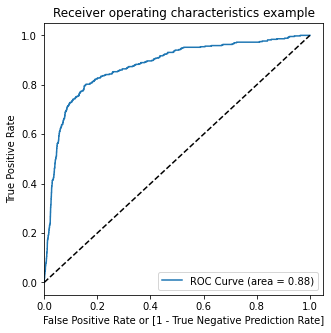

In [1210]:
#ROC Curve for the test dataset

#defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn_probability, y_pred_final.Conv_Prob, drop_intermediate = False)

#plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn_probability, y_pred_final.Conv_Prob)

The AUC score for train dataset is 0.90 and the test dataset is 0.88

### Decision Tree

In [1211]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)

In [1212]:
from sklearn.model_selection import GridSearchCV

In [1213]:
params = {'max_depth': [2, 3, 5, 10, 20],
          'min_samples_leaf': [5, 10, 20, 50, 100],
          'min_samples_split': [50,100, 50]}

In [1214]:
#instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, 
                           param_grid = params,
                           cv = 4, n_jobs = -1, 
                           verbose = 1, scoring = 'accuracy')

In [1215]:
dt_X_train = X_train_sm
dt_y_train = y_train_sm

grid_search.fit(dt_X_train, dt_y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 100, 50]},
             scoring='accuracy', verbose=1)

In [1216]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.401004,0.015992,0.015004,0.001862,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.791367,0.776563,0.764633,0.776394,0.777239,0.009483,61
1,0.404737,0.018399,0.014254,0.002384,2,5,100,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 100}",0.791367,0.776563,0.764633,0.776394,0.777239,0.009483,61
2,0.396997,0.011809,0.013754,0.003894,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.791367,0.776563,0.764633,0.776394,0.777239,0.009483,61
3,0.405746,0.016614,0.013258,0.001924,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 50}",0.791367,0.776563,0.764633,0.776394,0.777239,0.009483,61
4,0.396481,0.012896,0.017510,0.005724,2,10,100,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 100}",0.791367,0.776563,0.764633,0.776394,0.777239,0.009483,61


In [1217]:
score_df.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
60,2.152488,0.034748,0.014000,0.000705,20,5,50,"{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.855147,0.888351,0.881970,0.883077,0.877136,0.012923,1
62,2.136245,0.031740,0.013755,0.001094,20,5,50,"{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.855147,0.888351,0.881970,0.883077,0.877136,0.012923,1
63,2.059239,0.053518,0.013500,0.000500,20,10,50,"{'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 50}",0.860404,0.883232,0.880863,0.882801,0.876825,0.009523,3
65,2.203487,0.059800,0.016251,0.004547,20,10,50,"{'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 50}",0.860404,0.883232,0.880863,0.882801,0.876825,0.009523,3
45,1.693488,0.041772,0.013749,0.001483,10,5,50,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.853486,0.884615,0.880033,0.882524,0.875165,0.012621,5


In [1218]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=50,
                       random_state=42)

In [1219]:
dt_best = DecisionTreeClassifier(random_state = 42,
                                max_depth = 20,
                                min_samples_leaf = 5,
                                min_samples_split = 50)

In [1220]:
dt_best.fit(dt_X_train, dt_y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=50,
                       random_state=42)

In [1221]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [1222]:
dt_X_test = X_test
dt_y_test = y_test

In [1223]:
def evaluate_model1 (dt_classifier):
    confusion_mat = confusion_matrix(dt_y_train, dt_classifier.predict(dt_X_train))
    TP_con_mat = confusion_mat[1,1] # true positive 
    TN_con_mat = confusion_mat[0,0] # true negatives
    FP_con_mat = confusion_mat[0,1] # false positives
    FN_con_mat = confusion_mat[1,0] # false negatives
    print('Train Accuracy : ', accuracy_score(dt_y_train, dt_classifier.predict(dt_X_train)))
    print("Sensitivity :- ", TP_con_mat / float(TP_con_mat + FN_con_mat)) # Sensitivity
    print("Specificity :- ", TN_con_mat / float(TN_con_mat + FP_con_mat)) # Specificity
    print('-' * 50)
    confusion_mat_t = confusion_matrix(dt_y_test, dt_classifier.predict(dt_X_test))
    TP_con_mat_t = confusion_mat_t[1,1] # true positive 
    TN_con_mat_t = confusion_mat_t[0,0] # true negatives
    FP_con_mat_t = confusion_mat_t[0,1] # false positives
    FN_con_mat_t = confusion_mat_t[1,0] # false negatives
    print('Test Accuracy : ', accuracy_score(dt_y_test, dt_classifier.predict(dt_X_test)))
    print("Sensitivity :- ", TP_con_mat_t / float(TP_con_mat_t + FN_con_mat_t)) # Sensitivity
    print("Specificity :- ", TN_con_mat_t / float(TN_con_mat_t + FP_con_mat_t)) # Specificity
    

In [1224]:
evaluate_model1(dt_best)

Train Accuracy :  0.9262538913870633
Sensitivity :-  0.9322725700449671
Specificity :-  0.9202352127291594
--------------------------------------------------
Test Accuracy :  0.8566806242862581
Sensitivity :-  0.6114942528735632
Specificity :-  0.8788130317493256


### Random Forest

In [1225]:
from sklearn.ensemble import RandomForestClassifier

In [1226]:
rf_X_train = X_train_sm
rf_y_train = y_train_sm

rf_X_test = X_test
rf_y_test = y_test

In [1227]:
max_features = int(round(np.sqrt(rf_X_train.shape[1])))
print(max_features)

7


In [1228]:
rf = RandomForestClassifier(n_estimators = 100, 
                            max_depth = 4, 
                            max_features = 7, 
                            random_state = 100, 
                            oob_score = True, verbose = 1)

In [1229]:
rf.fit(rf_X_train, rf_y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.9s finished


RandomForestClassifier(max_depth=4, max_features=7, oob_score=True,
                       random_state=100, verbose=1)

In [1230]:
rf.oob_score_

0.8283638879280526

In [1231]:
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


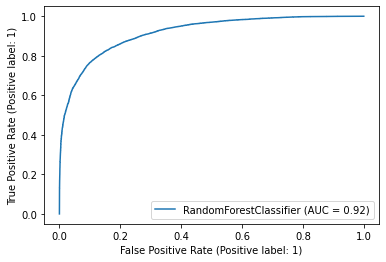

In [1232]:
#plot_roc_curve(rf, rf_X_train, rf_y_train)
RocCurveDisplay.from_estimator(rf, rf_X_train, rf_y_train)

#### Hyper-parameter tuning for the Random Forest

In [1233]:
rf = RandomForestClassifier(random_state = 42, n_jobs = -1)

In [1234]:
params = {'max_depth': [2, 3, 5],
          'min_samples_leaf': [50, 100],
          'min_samples_split': [100, 150, ],
          'n_estimators': [100, 200]}

In [1235]:
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = params,
                           cv = 4,
                           n_jobs = -1, verbose = 1, scoring = 'accuracy')

In [1236]:
grid_search.fit(rf_X_train, rf_y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [1237]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 200}

In [1238]:
rfc_model = RandomForestClassifier(bootstrap = True,
                                   max_depth = 5,
                                   min_samples_leaf = 50,
                                   min_samples_split = 100,
                                   n_estimators = 200)

In [1239]:
rfc_model.fit(rf_X_train, rf_y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [1240]:
def evaluate_model2 (classifier):
    confusion_mat = confusion_matrix(rf_y_train, classifier.predict(rf_X_train)) 
    TP_con_mat = confusion_mat[1,1] # true positive 
    TN_con_mat = confusion_mat[0,0] # true negatives
    FP_con_mat = confusion_mat[0,1] # false positives
    FN_con_mat = confusion_mat[1,0] # false negatives
    print('Train Accuracy : ', accuracy_score(rf_y_train, classifier.predict(rf_X_train)))
    print("Sensitivity :- ", TP_con_mat / float(TP_con_mat + FN_con_mat)) # Sensitivity
    print("Specificity :- ", TN_con_mat / float(TN_con_mat + FP_con_mat)) # Specificity
    print('-' * 50)
    confusion_mat_t = confusion_matrix(rf_y_test, classifier.predict(rf_X_test))
    TP_con_mat_t = confusion_mat_t[1,1] # true positive 
    TN_con_mat_t = confusion_mat_t[0,0] # true negatives
    FP_con_mat_t = confusion_mat_t[0,1] # false positives
    FN_con_mat_t = confusion_mat_t[1,0] # false negatives
    print('Test Accuracy : ', accuracy_score(rf_y_test, classifier.predict(rf_X_test)))
    print("Sensitivity :- ", TP_con_mat_t / float(TP_con_mat_t + FN_con_mat_t)) # Sensitivity
    print("Specificity :- ", TN_con_mat_t / float(TN_con_mat_t + FP_con_mat_t)) # Specificity
    

In [1241]:
evaluate_model2(rfc_model)

Train Accuracy :  0.8437564856451055
Sensitivity :-  0.7742649602213767
Specificity :-  0.9132480110688344
--------------------------------------------------
Test Accuracy :  0.8884659307194518
Sensitivity :-  0.6827586206896552
Specificity :-  0.9070346544926333


In [1242]:
rfc_model.feature_importances_

array([0.09090837, 0.00592663, 0.00687135, 0.01989323, 0.00284815,
       0.00535869, 0.03971625, 0.00750342, 0.02855868, 0.00230966,
       0.00107303, 0.        , 0.        , 0.00569867, 0.09030762,
       0.00997214, 0.20419706, 0.00133968, 0.00166939, 0.00280099,
       0.00362082, 0.00358314, 0.04900693, 0.10847791, 0.00250527,
       0.00457477, 0.0904256 , 0.00130831, 0.00312359, 0.0409741 ,
       0.00056302, 0.00071693, 0.02852455, 0.00058638, 0.00108317,
       0.019135  , 0.00052261, 0.00077271, 0.02096631, 0.00156542,
       0.0019059 , 0.00905441, 0.00636806, 0.00078636, 0.0007043 ,
       0.00074582, 0.05512098, 0.00469506, 0.00037057, 0.00092542,
       0.00631869, 0.00401487])

### AdaBoost

In [1243]:
adb_X_train = X_train_sm
adb_y_train = y_train_sm

adb_X_test = X_test
adb_y_test = y_test

In [1244]:
from sklearn.ensemble import AdaBoostClassifier

In [1245]:
adb_clf = AdaBoostClassifier()
adb_clf.fit(adb_X_train, adb_y_train)

AdaBoostClassifier()

In [1246]:
def evaluate_model_adb (classifier):
    confusion_mat = confusion_matrix(adb_y_train, classifier.predict(adb_X_train)) 
    TP_con_mat = confusion_mat[1,1] # true positive 
    TN_con_mat = confusion_mat[0,0] # true negatives
    FP_con_mat = confusion_mat[0,1] # false positives
    FN_con_mat = confusion_mat[1,0] # false negatives
    print('Train Accuracy :- ', accuracy_score(adb_y_train, classifier.predict(adb_X_train)))
    print("Sensitivity :- ", TP_con_mat / float(TP_con_mat + FN_con_mat)) # Sensitivity
    print("Specificity :- ", TN_con_mat / float(TN_con_mat + FP_con_mat)) # Specificity
    
    print('-' * 50)
    
    confusion_mat_t = confusion_matrix(adb_y_test, classifier.predict(adb_X_test))    
    TP_con_mat_t = confusion_mat_t[1,1] # true positive 
    TN_con_mat_t = confusion_mat_t[0,0] # true negatives
    FP_con_mat_t = confusion_mat_t[0,1] # false positives
    FN_con_mat_t = confusion_mat_t[1,0] # false negatives
    print('Test Accuracy :- ', accuracy_score(adb_y_test, classifier.predict(adb_X_test)))
    print("Sensitivity :- ", TP_con_mat_t / float(TP_con_mat_t + FN_con_mat_t)) # Sensitivity
    print("Specificity :- ", TN_con_mat_t / float(TN_con_mat_t + FP_con_mat_t)) # Specificity

In [1247]:
evaluate_model_adb(adb_clf)

Train Accuracy :-  0.8751988931165686
Sensitivity :-  0.8630923555863023
Specificity :-  0.887305430646835
--------------------------------------------------
Test Accuracy :-  0.8650551960411116
Sensitivity :-  0.6781609195402298
Specificity :-  0.8819257107283669


### XG Boost

In [1248]:
xgb_X_train = X_train_sm
xgb_y_train = y_train_sm

xgb_X_test = X_test
xgb_y_test = y_test

In [1249]:
from xgboost import XGBClassifier

In [1250]:
xgbmodel = XGBClassifier()
xgbmodel.fit(xgb_X_train, xgb_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [1251]:
def evaluate_model_xgb (classifier):
    print('Train Accuracy :- ', accuracy_score(xgb_y_train, classifier.predict(xgb_X_train)))
    confusion_mat = confusion_matrix(xgb_y_train, classifier.predict(xgb_X_train)) 
    TP_con_mat = confusion_mat[1,1] # true positive 
    TN_con_mat = confusion_mat[0,0] # true negatives
    FP_con_mat = confusion_mat[0,1] # false positives
    FN_con_mat = confusion_mat[1,0] # false negatives
    print("Sensitivity :- ", TP_con_mat / float(TP_con_mat + FN_con_mat)) # Sensitivity
    print("Specificity :- ", TN_con_mat / float(TN_con_mat + FP_con_mat)) # Specificity
    print('-' * 50)
    confusion_mat_t = confusion_matrix(xgb_y_test, classifier.predict(xgb_X_test)) 
    #metrics.confusion_matrix(pca_y_train, pred_probs_train1)
    TP_con_mat_t = confusion_mat_t[1,1] # true positive 
    TN_con_mat_t = confusion_mat_t[0,0] # true negatives
    FP_con_mat_t = confusion_mat_t[0,1] # false positives
    FN_con_mat_t = confusion_mat_t[1,0] # false negatives
    print('Test Accuracy :- ', accuracy_score(xgb_y_test, classifier.predict(xgb_X_test)))
    print("Sensitivity :- ", TP_con_mat_t / float(TP_con_mat_t + FN_con_mat_t)) # Sensitivity
    print("Specificity :- ", TN_con_mat_t / float(TN_con_mat_t + FP_con_mat_t)) # Specificity

In [1252]:
evaluate_model_xgb(xgbmodel)

Train Accuracy :-  0.9939813213420962
Sensitivity :-  0.9912832929782083
Specificity :-  0.996679349705984
--------------------------------------------------
Test Accuracy :-  0.9309097830224591
Sensitivity :-  0.48735632183908045
Specificity :-  0.9709483295289479


## PCA - Principal Component Analysis

In [1253]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 10)

In [1254]:
pca_X_train.shape

(16810, 52)

In [1255]:
pca = PCA(random_state = 42)

In [1256]:
pca.fit(pca_X_train)

PCA(random_state=42)

In [1257]:
pca.components_

array([[-9.90426696e-03, -7.99182337e-02, -9.74727314e-02, ...,
         1.69848926e-01,  4.35447656e-05, -8.48816798e-03],
       [ 2.89311095e-01,  1.37346355e-01,  1.94653867e-01, ...,
         4.85641414e-02,  1.14273988e-05,  2.28091894e-01],
       [ 2.09177223e-01, -3.55776054e-01, -4.36148266e-01, ...,
        -8.86666119e-03,  2.99066021e-03,  1.33293061e-01],
       ...,
       [-1.38028760e-05, -2.34674783e-05,  4.40883678e-05, ...,
        -4.15145876e-05, -5.35559625e-05,  2.20451579e-05],
       [ 1.51530538e-05,  1.58107116e-05,  8.66603192e-05, ...,
        -1.68771451e-05, -6.33433153e-05, -1.55387058e-04],
       [ 3.29090533e-06, -1.00170417e-05, -3.46873775e-05, ...,
         4.05847431e-06, -1.46183671e-04, -7.30428886e-06]])

#### Analysing the explained variance ration

In [1258]:
pca.explained_variance_ratio_

array([3.30757137e-01, 2.49757152e-01, 8.57094342e-02, 6.38745202e-02,
       4.43347508e-02, 3.43096102e-02, 3.36099665e-02, 3.05610553e-02,
       2.77727739e-02, 1.67762370e-02, 1.36537701e-02, 1.30483677e-02,
       7.50058659e-03, 6.74043417e-03, 6.28704581e-03, 5.68578769e-03,
       4.89873530e-03, 4.80169987e-03, 4.13830502e-03, 3.68999461e-03,
       2.31278963e-03, 2.23161812e-03, 1.89021336e-03, 1.48362031e-03,
       1.39183073e-03, 7.91994641e-04, 7.36442586e-04, 4.13517861e-04,
       3.46617688e-04, 1.68197691e-04, 1.23655371e-04, 8.38021042e-05,
       7.59094956e-05, 1.70732341e-05, 7.58275541e-06, 6.42388188e-06,
       3.60772927e-06, 3.11660159e-06, 1.79652537e-06, 1.54214163e-06,
       6.49773995e-07, 3.99551309e-07, 7.44145110e-08, 6.30229861e-08,
       2.30964343e-08, 1.78796157e-08, 1.60708675e-08, 1.42497337e-08,
       8.65279282e-09, 7.59070205e-09, 6.80550174e-09, 2.22153607e-09])

In [1259]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

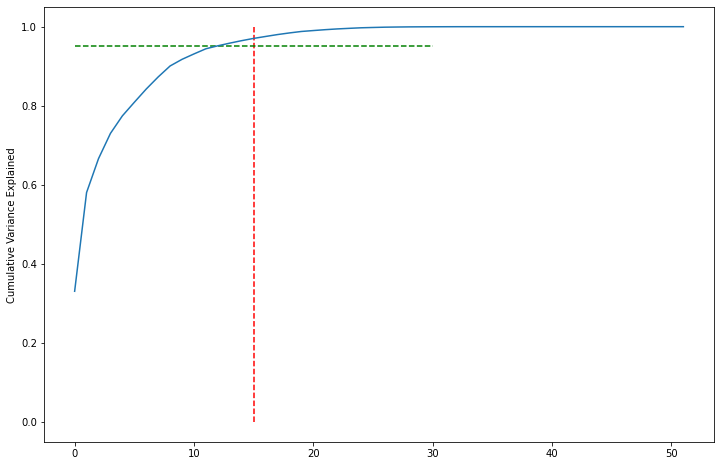

In [1260]:
fig = plt.figure(figsize = [12, 8])
plt.vlines(x = 15, ymax = 1, ymin = 0, colors = 'r', linestyles = '--')
plt.hlines(y = 0.95, xmax = 30, xmin = 0, colors = 'g', linestyles = '--')
plt.plot(var_cumu)
plt.ylabel('Cumulative Variance Explained')
plt.show()

We can also use Incremental PCA for the best result

In [1315]:
pca_final = IncrementalPCA(n_components = 16)

In [1316]:
df_train_pca = pca_final.fit_transform(pca_X_train)

In [1318]:
df_train_pca.shape

(16810, 16)

In [1319]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(16, 16)

In [1320]:
df_test_pca = pca_final.transform(pca_X_test)
df_test_pca.shape

(4203, 16)

## Logistic Regression with PCA (Principal Components Analysis)

In [1321]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, pca_y_train)

#### Making predictions on the test set

In [1322]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [1323]:
'{:2.2}'.format(metrics.roc_auc_score(pca_y_test, pred_probs_test[:,1]))

'0.88'

#### Confusion matrix, Sensitivity and Specificity

In [1324]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [1325]:
#confusion matrix
confusion_pca = metrics.confusion_matrix(pca_y_test, pred_probs_test1)
print(confusion_pca)

[[3836   38]
 [ 279   50]]


In [1326]:
TP_pca = confusion_pca[1,1] # true positive 
TN_pca = confusion_pca[0,0] # true negatives
FP_pca = confusion_pca[0,1] # false positives
FN_pca = confusion_pca[1,0] # false negatives

In [1327]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(pca_y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP_pca / float(TP_pca + FN_pca))

# Specificity
print("Specificity:-", TN_pca / float(TN_pca + FP_pca))

Accuracy:- 0.9245776826076612
Sensitivity:- 0.1519756838905775
Specificity:- 0.9901910170366546


#### Making predictions on the train set

In [1328]:
pred_probs_train = model_pca.predict(df_train_pca)

#### Confusion metrix, Sensitivity and Specificity

In [1329]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [1330]:
confusion_pca_1 = metrics.confusion_matrix(pca_y_train, pred_probs_train1)
print(confusion_pca_1)

[[15268   132]
 [ 1193   217]]


In [1331]:
TP_pca_1 = confusion_pca_1[1,1] # true positive 
TN_pca_1 = confusion_pca_1[0,0] # true negatives
FP_pca_1 = confusion_pca_1[0,1] # false positives
FN_pca_1 = confusion_pca_1[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(pca_y_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:-",TP_pca_1 / float(TP_pca_1 + FN_pca_1))

# Specificity
print("Specificity:-", TN_pca_1 / float(TN_pca_1 + FP_pca_1))

Accuracy:- 0.9211778703152885
Sensitivity:- 0.15390070921985816
Specificity:- 0.9914285714285714


## Decision Tree with PCA

In [1332]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_pca = DecisionTreeClassifier(random_state = 42)

In [1333]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [1334]:
#instantiate the grid search model
grid_search = GridSearchCV(estimator = dt_pca,
                          param_grid = params,
                          cv = 4, n_jobs = -1, verbose = 1, scoring = 'accuracy')

In [1335]:
grid_search.fit(df_train_pca, pca_y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [1336]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.159253,0.002176,0.003751,0.000437,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
1,0.161979,0.001869,0.003502,0.000865,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 150}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
2,0.156740,0.004913,0.003252,0.000434,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
3,0.154738,0.003424,0.003006,0.000006,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 50}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
4,0.157987,0.006601,0.003001,0.000006,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 150}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61


In [1337]:
score_df.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
54,0.530241,0.015677,0.003251,0.000434,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
56,0.528489,0.013517,0.003751,0.000431,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
69,0.586483,0.061132,0.003002,0.000002,20,50,50,"{'max_depth': 20, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
71,0.588737,0.051807,0.003503,0.000500,20,50,50,"{'max_depth': 20, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
55,0.529492,0.011279,0.003504,0.000499,10,50,150,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}",0.925291,0.923864,0.920990,0.922418,0.923141,0.001604,5


In [1338]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [1339]:
dt_best = DecisionTreeClassifier(random_state = 42,
                                max_depth = 10,
                                min_samples_leaf = 20,
                                min_samples_split = 50)

In [1340]:
dt_best.fit(df_train_pca, pca_y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [1341]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [1342]:
def evaluate_model_dt_pca(classifier):
    print("Train Accuracy :- ", accuracy_score(pca_y_train, classifier.predict(df_train_pca)))
    confusion_mat = confusion_matrix(pca_y_train, classifier.predict(df_train_pca))    
    TP_con_mat = confusion_mat[1,1] # true positive 
    TN_con_mat = confusion_mat[0,0] # true negatives
    FP_con_mat = confusion_mat[0,1] # false positives
    FN_con_mat = confusion_mat[1,0] # false negatives
    print("Sensitivity :- ", TP_con_mat / float(TP_con_mat + FN_con_mat)) # Sensitivity
    print("Specificity :- ", TN_con_mat / float(TN_con_mat + FP_con_mat)) # Specificity
    print("-"*50)
    print("Test Accuracy :- ", accuracy_score(pca_y_test, classifier.predict(df_test_pca)))
    confusion_mat_t = confusion_matrix(pca_y_test, classifier.predict(df_test_pca))    
    TP_con_mat_t = confusion_mat_t[1,1] # true positive 
    TN_con_mat_t = confusion_mat_t[0,0] # true negatives
    FP_con_mat_t = confusion_mat_t[0,1] # false positives
    FN_con_mat_t = confusion_mat_t[1,0] # false negatives
    print("Sensitivity :- ", TP_con_mat_t / float(TP_con_mat_t + FN_con_mat_t)) # Sensitivity
    print("Specificity :- ", TN_con_mat_t / float(TN_con_mat_t + FP_con_mat_t)) # Specificity


In [1343]:
evaluate_model_dt_pca(dt_best)

Train Accuracy :-  0.9365258774538965
Sensitivity :-  0.41134751773049644
Specificity :-  0.9846103896103896
--------------------------------------------------
Test Accuracy :-  0.926481084939329
Sensitivity :-  0.3130699088145897
Specificity :-  0.9785751161590088


## Random Forest with PCA

In [1344]:
from sklearn.ensemble import RandomForestClassifier

In [1345]:
max_features = int(round(np.sqrt(X_train.shape[1]))) #number of variables to consider to split each node
print(max_features)

7


In [1346]:
rf_pca = RandomForestClassifier(n_estimators = 100, max_depth = 4, max_features = 7, 
                            random_state = 100, oob_score = True, verbose = 1)

In [1347]:
rf_pca.fit(df_train_pca, pca_y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.1s finished


RandomForestClassifier(max_depth=4, max_features=7, oob_score=True,
                       random_state=100, verbose=1)

In [1348]:
rf_pca.oob_score_

0.9190362879238548

In [1349]:
from sklearn.metrics import RocCurveDisplay

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


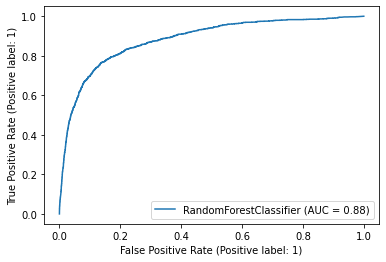

In [1350]:
RocCurveDisplay.from_estimator(rf_pca, df_train_pca, pca_y_train)
plt.show()

#### Hyper-Parameter tunning for the Random Forest

In [1351]:
rf_pca = RandomForestClassifier(random_state = 42, n_jobs = -1)

In [1352]:
params = {
    'max_depth': [2, 3, 5],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [100, 150, ],
    'n_estimators': [100, 200]
}

In [1353]:
grid_search = GridSearchCV(estimator = rf_pca,
                          param_grid = params,
                          cv = 4,
                          n_jobs = -1, verbose = 1, scoring = 'accuracy')

In [1354]:
grid_search.fit(df_train_pca, pca_y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [1355]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [1356]:
rfc_model = RandomForestClassifier(bootstrap = True,
                                 max_depth = 5,
                                 min_samples_leaf = 50,
                                 min_samples_split = 100,
                                 n_estimators = 200)

In [1357]:
rfc_model.fit(df_train_pca, pca_y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [1358]:
evaluate_model_dt_pca(rfc_model)

Train Accuracy :-  0.9207614515169542
Sensitivity :-  0.09574468085106383
Specificity :-  0.9962987012987014
--------------------------------------------------
Test Accuracy :-  0.9245776826076612
Sensitivity :-  0.0851063829787234
Specificity :-  0.9958699019101703


In [1359]:
rfc_model.feature_importances_

array([0.06301054, 0.15758183, 0.0225706 , 0.09151393, 0.02390947,
       0.17769529, 0.05684246, 0.03972735, 0.04516384, 0.24504233,
       0.01191223, 0.02874852, 0.02310867, 0.00522399, 0.00355539,
       0.00439356])

## AdaBoost with PCA

In [1360]:
from sklearn.ensemble import AdaBoostClassifier

In [1361]:
adb_pca = AdaBoostClassifier()
adb_pca.fit(df_train_pca, pca_y_train)

AdaBoostClassifier()

In [1362]:
evaluate_model_dt_pca(adb_pca)

Train Accuracy :-  0.9248066627007734
Sensitivity :-  0.3021276595744681
Specificity :-  0.9818181818181818
--------------------------------------------------
Test Accuracy :-  0.9236259814418273
Sensitivity :-  0.2553191489361702
Specificity :-  0.9803820340733093


## XG Boost with PCA

In [1363]:
from xgboost import XGBClassifier

In [1364]:
xgb_pca = XGBClassifier()
xgb_pca.fit(df_train_pca, pca_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [1365]:
evaluate_model_dt_pca(xgb_pca)

Train Accuracy :-  0.9934562760261749
Sensitivity :-  0.926950354609929
Specificity :-  0.9995454545454545
--------------------------------------------------
Test Accuracy :-  0.9352843207232929
Sensitivity :-  0.4012158054711246
Specificity :-  0.9806401652039236


#### Conclusion :
The best model to predict the churn is observed to be Random Forest considering on the accuracy as performance measure.

The In-Coming calls plays a important role in understanding the possibility of churn. Thus the operator should focus on incoming calls data and has to provide some kind of special offers to the customers whose incoming calls turning lower.

#### Details:
After cleaning the data, we broadly employed five models as mentioned below including some variations within these models in order to arrive at the best model in each of the cases.

#### Accuracy Score's for all is as folloed

#### Logistic Regression:
      - Train Accuracy : ~83%  
      - Test Accuracy : ~82%

#### Logistic regression with PCA:
      - Train Accuracy : ~92%  
      - Test Accuracy : ~92%

#### Decision Tree:
      - Train Accuracy : ~93%  
      - Test Accuracy : ~86%

#### Decision Tree with PCA:
      - Train Accuracy : ~94%  
      - Test Accuracy : ~93%


#### Random Forest:
      - Train Accuracy : ~84%  
      - Test Accuracy : ~89%

#### Random Forest with PCA:
      - Train Accuracy : ~92%  
      - Test Accuracy : ~92%


#### AdaBoost:
      - Train Accuracy : ~88%  
      - Test Accuracy : ~87%

#### AdaBoost with PCA:
      - Train Accuracy : ~92%  
      - Test Accuracy : ~92%


#### XG Boost:
      - Train Accuracy : ~99%  
      - Test Accuracy : ~93%

#### XG Boost with PCA:
      - Train Accuracy : ~99%  
      - Test Accuracy : ~94%


## Now testing on test.csv

In [1366]:
churn_test = pd.read_csv('test.csv')

In [1367]:
churn_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [1368]:
churn_test.shape

(30000, 171)

In [1369]:
churn_test.isnull().sum()

id                          0    
circle_id                   0    
loc_og_t2o_mou              316  
std_og_t2o_mou              316  
loc_ic_t2o_mou              316  
last_date_of_month_6        0    
last_date_of_month_7        202  
last_date_of_month_8        367  
arpu_6                      0    
arpu_7                      0    
arpu_8                      0    
onnet_mou_6                 1169 
onnet_mou_7                 1172 
onnet_mou_8                 1675 
offnet_mou_6                1169 
offnet_mou_7                1172 
offnet_mou_8                1675 
roam_ic_mou_6               1169 
roam_ic_mou_7               1172 
roam_ic_mou_8               1675 
roam_og_mou_6               1169 
roam_og_mou_7               1172 
roam_og_mou_8               1675 
loc_og_t2t_mou_6            1169 
loc_og_t2t_mou_7            1172 
loc_og_t2t_mou_8            1675 
loc_og_t2m_mou_6            1169 
loc_og_t2m_mou_7            1172 
loc_og_t2m_mou_8            1675 
loc_og_t2f_mou

In [1370]:
churn_id = churn_test['id']

In [1371]:
churn_test['tenure'] = (churn_test['aon']/30).round(0)
churn_test['avg_arpu_6_7'] = (churn_test['arpu_6'] + churn_test['arpu_7']) / 2

churn_test = churn_test[X.columns]

In [1372]:
churn_test.shape

(30000, 52)

In [1373]:
churn_test_null = churn_test.isnull().sum().sum() / np.product(churn_test.shape) * 100
churn_test_null

11.436923076923076

In [1374]:
for col in churn_test.columns:
    null_col = churn_test[col].isnull().sum() / churn_test.shape[0] * 100
    print('{}: {:.2f}'.format(col, null_col))

arpu_8: 0.00
onnet_mou_6: 3.90
onnet_mou_7: 3.91
onnet_mou_8: 5.58
offnet_mou_6: 3.90
offnet_mou_7: 3.91
offnet_mou_8: 5.58
std_og_t2t_mou_8: 5.58
std_og_t2m_mou_8: 5.58
isd_og_mou_8: 5.58
og_others_6: 3.90
og_others_7: 3.91
og_others_8: 5.58
total_og_mou_7: 0.00
total_og_mou_8: 0.00
std_ic_mou_8: 5.58
total_ic_mou_8: 0.00
ic_others_6: 3.90
ic_others_7: 3.91
ic_others_8: 5.58
total_rech_num_6: 0.00
total_rech_num_7: 0.00
total_rech_num_8: 0.00
total_rech_amt_8: 0.00
max_rech_amt_6: 0.00
max_rech_amt_7: 0.00
max_rech_amt_8: 0.00
max_rech_data_6: 74.72
max_rech_data_7: 74.31
max_rech_data_8: 73.59
vol_2g_mb_6: 0.00
vol_2g_mb_7: 0.00
vol_2g_mb_8: 0.00
vol_3g_mb_6: 0.00
vol_3g_mb_7: 0.00
vol_3g_mb_8: 0.00
night_pck_user_6: 74.72
night_pck_user_7: 74.31
night_pck_user_8: 73.59
monthly_2g_6: 0.00
monthly_2g_7: 0.00
monthly_2g_8: 0.00
sachet_2g_8: 0.00
monthly_3g_6: 0.00
monthly_3g_7: 0.00
monthly_3g_8: 0.00
fb_user_8: 73.59
aug_vbc_3g: 0.00
jul_vbc_3g: 0.00
jun_vbc_3g: 0.00
tenure: 0.00
avg_

In [1375]:
for col in churn_test.columns:
    null_col = churn_test[col].isnull().sum() / churn_test.shape[0] * 100
    if null_col > 0:
        churn_test[col] = churn_test[col].fillna(churn_test[col].mode()[0])

In [1376]:
churn_test.isnull().sum().sum()

0

In [1377]:
churn_test_final = pca_final.transform(churn_test)

In [1378]:
churn_test_final.shape

(30000, 16)

In [1379]:
#predict_probability = rfc_model.predict(churn_test_final) #RandomForest
predict_probability = xgb_pca.predict(churn_test_final) #XG Boost
#predict_probability = adb_pca.predict(churn_test_final) #Ada Boost

In [1380]:
predict_probability.shape

(30000,)

In [1381]:
len(churn_id)

30000

In [1382]:
final_prediction = pd.DataFrame({'id': churn_id, 'churn_probability': predict_probability})

In [1383]:
final_prediction.to_csv('submission.csv', index = False)